# COMP3010J Machine Learning Project 

# (Australian Rain Data)

### Student Name: Siying Li

### UCD Number: 22207236
### BJUT Number： 22372130

## 1. Introduction

### 1.1 Problem Statement

This project aims to address the challenge of weather prediction by developing machine learning models to forecast whether it will rain the next day in Australia. Utilizing a comprehensive dataset comprising approximately 10 years of daily meteorological observations from multiple locations across Australia, this study explores the application of various classification algorithms for binary weather prediction.

### 1.2 Dataset Overview

The dataset comprises approximately 10 years of daily weather observations collected from numerous locations across Australia by the Bureau of Meteorology.

**Feature Categories**:
- Temperature metrics (MinTemp, MaxTemp, Temp9am, Temp3pm)
- Precipitation data (Rainfall, RainToday)
- Atmospheric conditions (Pressure, Humidity, Cloud-cover)
- Wind measurements (Speed, Direction at different times)
- Evaporation and Sunshine records
- Location and temporal information

**Target Variable**: 
- RainTomorrow (Yes/No), the definition is the rainfall on the second day is greater than 1mm.

## 2. Load and analyse data

### 2.1 Load Dataset

Load data, convert each variable to correct formats, identify target attribute, etc

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [60]:
import pandas as pd
df = pd.read_csv("weatherAUS.csv")

# see some data
print("datashape:", df.shape)
print("test of printing the first five lines of data:")
df.head()

datashape: (145460, 23)
test of printing the first five lines of data:


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### 2.2 Data Health Report

Show a data health report, mean, median, min, standard deviation, percent of missing value for an 
attribute, etc.

In [61]:
print("Basic Information")

data_info = pd.DataFrame({
    'Column': df.columns,
    'Non-Null Count': df.count().values,
    'Null Count': df.isnull().sum().values,
    'Null Percentage': (df.isnull().sum() / len(df) * 100),
    'Data Type': df.dtypes.values,
    'Unique Values': [df[col].nunique() for col in df.columns]
})

# show as a table
data_info

Basic Information


,Column,Non-Null Count,Null Count,Null Percentage,Data Type,Unique Values
Date,Date,145460,0,0.000000,object,3436
Location,Location,145460,0,0.000000,object,49
MinTemp,MinTemp,143975,1485,1.020899,float64,389
MaxTemp,MaxTemp,144199,1261,0.866905,float64,505
Rainfall,Rainfall,142199,3261,2.241853,float64,681
Evaporation,Evaporation,82670,62790,43.166506,float64,358
Sunshine,Sunshine,75625,69835,48.009762,float64,145
WindGustDir,WindGustDir,135134,10326,7.098859,object,16
WindGustSpeed,WindGustSpeed,135197,10263,7.055548,float64,67
WindDir9am,WindDir9am,134894,10566,7.263853,object,16


In [62]:
print("Report on Numerical Characteristics")
numeric_stats = df.select_dtypes(include=[np.number]).describe().transpose()
numeric_stats['missing_count'] = df.select_dtypes(include=[np.number]).isnull().sum()
numeric_stats['missing_percent'] = (numeric_stats['missing_count'] / len(df)) * 100

health_report = numeric_stats[['mean', '50%', 'std', 'min', 'max', 'missing_count', 'missing_percent']]
health_report = health_report.rename(columns={'50%': 'median'})

numeric_info = pd.DataFrame({
    'Column': health_report.index,
    'mean': health_report['mean'].values,
    'median': health_report['median'].values,
    'std': health_report['std'].values,
    'min': health_report['min'].values,
    'max': health_report['max'].values,
    'missing_count': health_report['missing_count'].values,
    'missing_percent': health_report['missing_percent'].values
})

from IPython.display import display
display(numeric_info.round(4))

Report on Numerical Characteristics


,Column,mean,median,std,min,max,missing_count,missing_percent
0,MinTemp,12.1940,12.0,6.3985,-8.5,33.9,1485,1.0209
1,MaxTemp,23.2213,22.6,7.1190,-4.8,48.1,1261,0.8669
2,Rainfall,2.3609,0.0,8.4781,0.0,371.0,3261,2.2419
3,Evaporation,5.4682,4.8,4.1937,0.0,145.0,62790,43.1665
4,Sunshine,7.6112,8.4,3.7855,0.0,14.5,69835,48.0098
5,WindGustSpeed,40.0352,39.0,13.6071,6.0,135.0,10263,7.0555
6,WindSpeed9am,14.0434,13.0,8.9154,0.0,130.0,1767,1.2148
7,WindSpeed3pm,18.6627,19.0,8.8098,0.0,87.0,3062,2.1050
8,Humidity9am,68.8808,70.0,19.0292,0.0,100.0,2654,1.8246
9,Humidity3pm,51.5391,52.0,20.7959,0.0,100.0,4507,3.0984


In [63]:
print("Report on Missing Values of Classification Features")

all_missing = df.isnull().sum()
all_report = pd.DataFrame({
    'missing_count': all_missing,
    'missing_percent': (all_missing / len(df)) * 100
})

all_report = all_report[all_report['missing_count'] > 0]

if not all_report.empty:
    all_info = pd.DataFrame({
        'Column': all_report.index,
        'missing_count': all_report['missing_count'].values,
        'missing_percent': all_report['missing_percent'].values
    })
    
    all_info = all_info.sort_values('missing_percent', ascending=False)
    from IPython.display import display
    display(all_info)
else:
    print("No missing values in any features.")

Report on Missing Values of Classification Features


,Column,missing_count,missing_percent
4,Sunshine,69835,48.009762
3,Evaporation,62790,43.166506
16,Cloud3pm,59358,40.807095
15,Cloud9am,55888,38.421559
13,Pressure9am,15065,10.356799
14,Pressure3pm,15028,10.331363
7,WindDir9am,10566,7.263853
5,WindGustDir,10326,7.098859
6,WindGustSpeed,10263,7.055548
12,Humidity3pm,4507,3.098446


In [64]:
print("RainTomorrow_percentage:")
print(df['RainTomorrow'].value_counts())
print(f"RainTomorrow_Percentage: {df['RainTomorrow'].value_counts(normalize=True)['Yes']:.2%}")

RainTomorrow_percentage:
RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64
RainTomorrow_Percentage: 22.42%


#### Conclusion
- The dataset consists of 145,460 records and 23 features.
- There is a serious problem of missing values, especially for features such as Sunshine (48%) and Evaporation (43%).
- The target variable exhibits a class imbalance: Rain (22.42%) vs No Rain (77.58%)

## 3. Data Cleaning

### 3.1 Back Up Original Data

In [65]:
df_original = df.copy()
print(f"Original dataset shape: {df.shape}")

Original dataset shape: (145460, 23)


### 3.2 Handling Missing Count
- handing the missing count first, or the dataset will be reset in the end.

In [66]:
missing_summary = df.isnull().sum()
missing_percentage = (missing_summary / len(df)) * 100

print("Missing values summary:")
high_missing = missing_percentage[missing_percentage > 30]
medium_missing = missing_percentage[(missing_percentage > 5) & (missing_percentage <= 30)]
low_missing = missing_percentage[missing_percentage <= 5]

print(f"  High missing (>30%): {len(high_missing)} columns")
print(f"  Medium missing (5-30%): {len(medium_missing)} columns") 
print(f"  Low missing (<=5%): {len(low_missing)} columns")

for col in df.columns:
    if missing_percentage[col] > 0:
        if missing_percentage[col] > 30:
            # High missing - delete or fill with median or mode
            if missing_percentage[col] > 50:
                df = df.drop(col, axis=1)
                print(f"    {col}: {missing_percentage[col]:.1f}% missing -> DROPPED")
            else:
                if df[col].dtype in ['int64', 'float64']:
                    df[col].fillna(df[col].median(), inplace=True)
                else:
                    df[col].fillna(df[col].mode()[0] if len(df[col].mode()) > 0 else 0, inplace=True)
                print(f"    {col}: {missing_percentage[col]:.1f}% missing -> filled with median/mode")
        
        elif missing_percentage[col] > 5:
            # medium missing - fill with median or mode
            if df[col].dtype in ['int64', 'float64']:
                df[col].fillna(df[col].median(), inplace=True)
            else:
                df[col].fillna(df[col].mode()[0] if len(df[col].mode()) > 0 else 0, inplace=True)
            print(f"    {col}: {missing_percentage[col]:.1f}% missing -> filled with median/mode")
        
        else:
            # low missing - fill with median or mode
            if df[col].dtype in ['int64', 'float64']:
                df[col].fillna(df[col].mean(), inplace=True)
            else:
                df[col].fillna(df[col].mode()[0] if len(df[col].mode()) > 0 else 0, inplace=True)
            print(f"    {col}: {missing_percentage[col]:.1f}% missing -> filled with mean/mode")

# check if still remain missing
remaining_missing = df.isnull().sum().sum()
print(f"  Remaining missing values after processing: {remaining_missing}")

Missing values summary:
  High missing (>30%): 4 columns
  Medium missing (5-30%): 5 columns
  Low missing (<=5%): 14 columns
    MinTemp: 1.0% missing -> filled with mean/mode
    MaxTemp: 0.9% missing -> filled with mean/mode
    Rainfall: 2.2% missing -> filled with mean/mode
    Evaporation: 43.2% missing -> filled with median/mode
    Sunshine: 48.0% missing -> filled with median/mode
    WindGustDir: 7.1% missing -> filled with median/mode
    WindGustSpeed: 7.1% missing -> filled with median/mode
    WindDir9am: 7.3% missing -> filled with median/mode
    WindDir3pm: 2.9% missing -> filled with mean/mode
    WindSpeed9am: 1.2% missing -> filled with mean/mode
    WindSpeed3pm: 2.1% missing -> filled with mean/mode
    Humidity9am: 1.8% missing -> filled with mean/mode
    Humidity3pm: 3.1% missing -> filled with mean/mode
    Pressure9am: 10.4% missing -> filled with median/mode
    Pressure3pm: 10.3% missing -> filled with median/mode
    Cloud9am: 38.4% missing -> filled with 

In [67]:
print(f"dataset shapde: {df.shape}")
print(f"missing count number: {df.isnull().sum().sum()}")

print("\ndata type:")
print(df.dtypes.value_counts())

print(f"row number: {len(df)}")
print(f"column number: {len(df.columns)}")
print(f"Numeric column: {len(df.select_dtypes(include=[np.number]).columns)}")

print("Sample Dataset:")
display(df.head(5))

dataset shapde: (145460, 23)
missing count number: 0

data type:
float64    16
object      7
Name: count, dtype: int64
row number: 145460
column number: 23
Numeric column: 16
Sample Dataset:


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### 3.3 Date Feature

- change 'date' format to 'datetime'
- get the feature of 'year', 'month', 'day' and 'season'
- 1=spring, 2=summer, 3=autumn, 4=winter
- remove the original date list

In [68]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    def get_australian_season(month):
        if month in [12, 1, 2]:    # summer
            return 1
        elif month in [3, 4, 5]:   # autumn
            return 2
        elif month in [6, 7, 8]:   # winter
            return 3
        else:                      # spring
            return 4
    
    df['Season'] = df['Month'].apply(get_australian_season)
    # 1:Summer, 2:Autumn, 3:Winter, 4:Spring
    
    print("  Date features created: Year, Month, Day, Season")
    print(f"  Date range: {df['Date'].min()} to {df['Date'].max()}")
    
    df = df.drop('Date', axis=1)
    print("  Original Date column removed")

print(f"Dataset shape after date engineering: {df.shape}")

  Date features created: Year, Month, Day, Season
  Date range: 2007-11-01 00:00:00 to 2017-06-25 00:00:00
  Original Date column removed
Dataset shape after date engineering: (145460, 26)


**(The number '26' proves that the change of date is successful)**

remove 'date' (means 23-1=22)

add four new features (means 22+4=26)

### 3.4 Categorical Variables  

- **Wind** (WindGustDir, WindDir9am, WindDir3pm): use **Mapping** to change to ordered numbers (0-15)

  because the wind directions (N>NNE>...) are ordered, which is suited for 0-15
  
- **RainToday & RainTomorrow** (RainToday, RainTomorrow): use **Mapping** to change to '0/1' format

  because these two categories just have two results (n/y)
- **Location** (Location): use **one-hot** to create multiple binary features

In [69]:
# recognize categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"  Categorical columns: {categorical_cols}")

  Categorical columns: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


#### 3.4.1 Wind

In [70]:
wind_directions = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 
                   'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']

wind_direction_mapping = {dir: i for i, dir in enumerate(wind_directions)}

print("wind mapping:")
for direction, number in wind_direction_mapping.items():
    print(f"  '{direction}' -> {number}")

wind_cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
print(f"\nwind columns: {wind_cols}")
    
for col in wind_cols:
    if col in df.columns:
        df[col] = df_original[col].map(wind_direction_mapping)
        print(f"{col}: the number of changed data is {df[col].count()}")

        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

print("\ntest:")
for col in wind_cols:
    if col in df.columns:
        unique_vals = sorted(df[col].dropna().unique())
        print(f"  {col}: {unique_vals}")

wind mapping:
  'N' -> 0
  'NNE' -> 1
  'NE' -> 2
  'ENE' -> 3
  'E' -> 4
  'ESE' -> 5
  'SE' -> 6
  'SSE' -> 7
  'S' -> 8
  'SSW' -> 9
  'SW' -> 10
  'WSW' -> 11
  'W' -> 12
  'WNW' -> 13
  'NW' -> 14
  'NNW' -> 15

wind columns: ['WindGustDir', 'WindDir9am', 'WindDir3pm']
WindGustDir: the number of changed data is 135134
WindDir9am: the number of changed data is 134894
WindDir3pm: the number of changed data is 141232

test:
  WindGustDir: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]
  WindDir9am: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]
  WindDir3pm: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]


**Explaination of the test**
- Before the test code, the number of changed data of the three kinds of wind situation are equal to the numbers provided in **2.2 Data Health Report**
- The test is used to get the unique quality in the lists without repeating and sort them. Therefore, the results prove that the data has been changed successfully.

#### 3.4.2 RainToday & RainTomorrow

In [71]:
binary_cols = ['RainToday', 'RainTomorrow']
print(f"binary_cols: {binary_cols}")

for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].map({'No': 0, 'Yes': 1})


for col in binary_cols:
    if col in df.columns:
        value_counts = df[col].value_counts().sort_index()
        total_count = df[col].count()
        
        print(f"\n{col}:")
        print(f"  Non-Null Count: {total_count}")
        print(f"  Distribution:")
        
        for value, count in value_counts.items():
            label = "No" if value == 0 else "Yes"
            percentage = (count / total_count) * 100
            print(f"    {value} ({label}): {count}  ({percentage:.1f}%)")

print("\ntest:")
for col in binary_cols:
    if col in df.columns:
        unique_vals = sorted(df[col].dropna().unique())
        print(f"  {col}: {unique_vals} ")

binary_cols: ['RainToday', 'RainTomorrow']

RainToday:
  Non-Null Count: 145460
  Distribution:
    0 (No): 113580  (78.1%)
    1 (Yes): 31880  (21.9%)

RainTomorrow:
  Non-Null Count: 145460
  Distribution:
    0 (No): 113583  (78.1%)
    1 (Yes): 31877  (21.9%)

test:
  RainToday: [0, 1] 
  RainTomorrow: [0, 1] 


**Explaination of the test**
- Before the test code, the number of changed data of the two kinds features are equal to the total number provided in **2.2 Data Health Report**
- The test is used to get the unique quality in the lists without repeating and sort them. Therefore, the results prove that the data has been changed successfully.

#### 3.4.3 Location

In [72]:
if 'Location' in df.columns:
    location_dummies = pd.get_dummies(df['Location'], prefix='Location')
    df = pd.concat([df, location_dummies], axis=1)
    df = df.drop('Location', axis=1)
    print(f"  Location one-hot encoded: {len(location_dummies.columns)} new columns")

    location_columns = [col for col in df.columns if col.startswith('Location_')]
    for col in location_columns:
        df[col] = df[col].astype(int)
    print(f"  Location columns converted to int")

print(f"Dataset shape after categorical processing: {df.shape}")

  Location one-hot encoded: 49 new columns
  Location columns converted to int
Dataset shape after categorical processing: (145460, 74)


In [73]:
location_columns = [col for col in df.columns if col.startswith('Location_')]

print("test:")
location_sum = df[location_columns].sum(axis=1)
unique_sums = location_sum.unique()
print(f"Unique Number: {unique_sums}")

if set(unique_sums) == {1}:
    print("Each row has exactly one Location marked as 1.")
else:
    print("ERROR")

# check if any row has no record
zero_count = (location_sum == 0).sum()
if zero_count == 0:
    print("Each row has at least one record")
else:
    print(f" {zero_count} rows have no records")

# check if any row has more than one record
multi_count = (location_sum > 1).sum()
if multi_count == 0:
    print("Each row has no more than one record")
else:
    print(f"{multi_count} rows have more than one records")

test:
Unique Number: [1]
Each row has exactly one Location marked as 1.
Each row has at least one record
Each row has no more than one record


**The number of feature**
- Because the feature 'Location' is changed to 'Location_Adelaide	', 'Location_Albany' and so on, this feature is divided, thus the number of feature is 25 from now on.

### 3.5 Overview of Processed Dataset
- Present the first five rows of the processed data set using a transposed table

In [74]:
print(f"column number: {len(df.columns)}")
print(f"row number: {len(df)}")

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_encoded = [col for col in df.columns if col.startswith(('Location_'))]

print(f"Numeric column: {len(numeric_cols)}")
print(f"categorical column: {len(categorical_encoded)}")
print(f"others: {len(df.columns) - len(numeric_cols) - len(categorical_encoded)}")

print("Processed Dataset - Transposed View (All Columns):")

pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)

# Create a transposed view that displays only the first five rows of data.
transposed_df = df.head(5).T
transposed_df.columns = [f'Row_{i+1}' for i in transposed_df.columns]

# Add column information
transposed_df['Data_Type'] = df.dtypes
transposed_df['Non_Null_Count'] = df.count()
transposed_df['Null_Count'] = df.isnull().sum()

column_order = ['Data_Type', 'Non_Null_Count', 'Null_Count', 'Row_1', 'Row_2', 'Row_3', 'Row_4', 'Row_5']
transposed_df = transposed_df[column_order]

display(transposed_df)

pd.reset_option('display.max_rows')
pd.reset_option('display.width')

column number: 74
row number: 145460
Numeric column: 74
categorical column: 49
others: -49
Processed Dataset - Transposed View (All Columns):


,Data_Type,Non_Null_Count,Null_Count,Row_1,Row_2,Row_3,Row_4,Row_5
MinTemp,float64,145460,0,13.4,7.4,12.9,9.2,17.5
MaxTemp,float64,145460,0,22.9,25.1,25.7,28.0,32.3
Rainfall,float64,145460,0,0.6,0.0,0.0,0.0,1.0
Evaporation,float64,145460,0,4.8,4.8,4.8,4.8,4.8
Sunshine,float64,145460,0,8.4,8.4,8.4,8.4,8.4
WindGustDir,float64,145460,0,12.0,13.0,11.0,2.0,12.0
WindGustSpeed,float64,145460,0,44.0,44.0,46.0,24.0,41.0
WindDir9am,float64,145460,0,12.0,15.0,12.0,6.0,3.0
WindDir3pm,float64,145460,0,13.0,11.0,11.0,4.0,14.0
WindSpeed9am,float64,145460,0,20.0,4.0,19.0,11.0,7.0


### 3.6 NORMALIZATION

In [75]:
#Identify the numerical columns that need to be standardized
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"The number of original numerical columns: {len(numeric_cols)}")

# exclude values
exclude_from_scaling = []
if 'RainTomorrow' in numeric_cols:
    exclude_from_scaling.append('RainTomorrow')
if 'RainToday' in numeric_cols:
    exclude_from_scaling.append('RainToday')
if 'Year' in numeric_cols:
    exclude_from_scaling.append('Year')
if 'Month' in numeric_cols:
    exclude_from_scaling.append('Month') 
if 'Day' in numeric_cols:
    exclude_from_scaling.append('Day')
if 'Season' in numeric_cols:
    exclude_from_scaling.append('Season')

location_cols = [col for col in numeric_cols if col.startswith('Location_')]
exclude_from_scaling.extend(location_cols)

wind_cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
for col in wind_cols:
    if col in numeric_cols:
        exclude_from_scaling.append(col)

exclude_from_scaling = list(set(exclude_from_scaling))

#include values
cols_to_scale = [col for col in numeric_cols if col not in exclude_from_scaling]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

max_len = max(len(cols_to_scale), len(exclude_from_scaling))

comparison_data = {
    f'Normalization ({len(cols_to_scale)})': cols_to_scale + ['/'] * (max_len - len(cols_to_scale)),
    f'Non-normalization ({len(exclude_from_scaling)})': exclude_from_scaling + ['/'] * (max_len - len(exclude_from_scaling))
}

comparison_df = pd.DataFrame(comparison_data)
display(comparison_df)

#table
standardization_results = []
for col in cols_to_scale[:16]:
    standardization_results.append({
        'Column': col,
        'Mean': df_scaled[col].mean(),
        'Std': df_scaled[col].std(),
        'Min': df_scaled[col].min(),
        'Max': df_scaled[col].max()
    })

results_df = pd.DataFrame(standardization_results)
display(results_df.round(6).style.set_caption("Standardized verification results"))


print(f"  Total columns number: {len(df_scaled.columns)}")
print(f"  Total row number: {len(df_scaled)}")
print(f"  Standardized column count: {len(cols_to_scale)}")
print(f"  Non-standardized column count: {len(exclude_from_scaling)}")

# Update the main data frame
df = df_scaled

The number of original numerical columns: 74


,Normalization (16),Non-normalization (58)
0,MinTemp,Location_Dartmoor
1,MaxTemp,Location_NorahHead
2,Rainfall,Year
3,Evaporation,Location_Uluru
4,Sunshine,Location_Watsonia
5,WindGustSpeed,Location_Walpole
6,WindSpeed9am,Month
7,WindSpeed3pm,Location_Penrith
8,Humidity9am,Location_Albury
9,Humidity3pm,Location_Ballarat


,Column,Mean,Std,Min,Max
0,MinTemp,-0.000000,1.000003,-3.250851,3.409817
1,MaxTemp,-0.000000,1.000003,-3.953295,3.509919
2,Rainfall,0.000000,1.000003,-0.281650,43.977441
3,Evaporation,-0.000000,1.000003,-1.629472,43.985108
4,Sunshine,-0.000000,1.000003,-2.897217,2.360634
5,WindGustSpeed,0.000000,1.000003,-2.588407,7.243246
6,WindSpeed9am,0.000000,1.000003,-1.584853,13.086130
7,WindSpeed3pm,0.000000,1.000003,-2.141060,7.839952
8,Humidity9am,-0.000000,1.000003,-3.653245,1.650473
9,Humidity3pm,0.000000,1.000003,-2.517650,2.367281


  Total columns number: 74
  Total row number: 145460
  Standardized column count: 16
  Non-standardized column count: 58


**Overview of Normalization**
- The means of all the standardized columns are all close to 0.
- The standard deviations of all the standardized columns are all close to 1.
- Most of the features fall within the ±3 standard deviation range, which is in line with the expected normal distribution.
- Abnormal Value: Rainfall & Evaporation

## 4.  Data Visualisation

### 4.1 Analysis of the distribution of the rain possibility

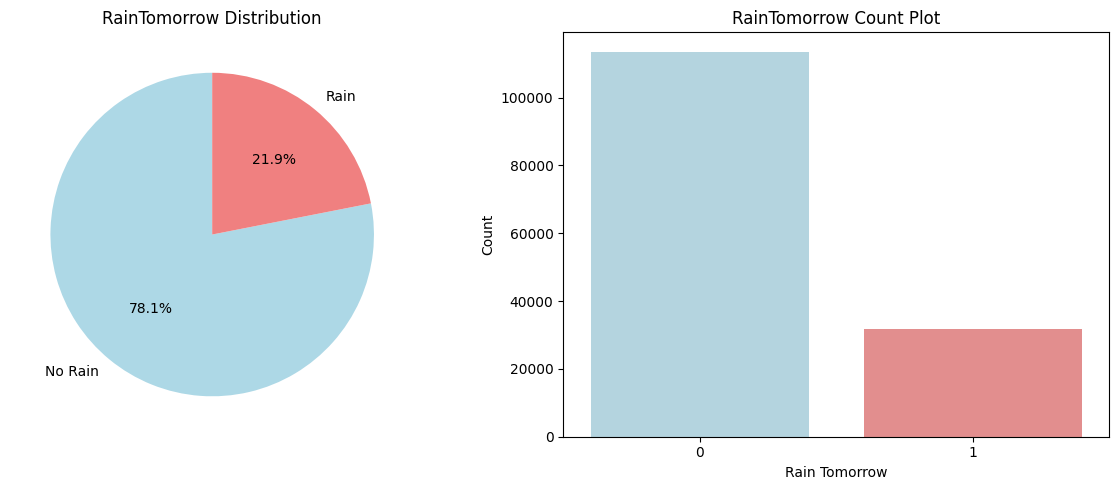

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
rain_tomorrow_counts = df['RainTomorrow'].value_counts()
plt.pie(rain_tomorrow_counts.values, labels=['No Rain', 'Rain'], autopct='%1.1f%%', 
        colors=['lightblue', 'lightcoral'], startangle=90)
plt.title('RainTomorrow Distribution')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='RainTomorrow', palette=['lightblue', 'lightcoral'])
plt.title('RainTomorrow Count Plot')
plt.xlabel('Rain Tomorrow')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

- The data shows that the percentage of "No Rain" occupies more (78.1% approximately)


### 4.2 Analysis of other features relates to rain possibility
- Including 'humidity3pm', 'rainfall', 'cloud3pm', 'sunshine' and 'pressure3pm'
- The blue box means the normal data for 'the possibility of not rain tomorrow', while the red box means the normal data for 'the possibility for rain tomorrow'. The dots mean the abnormal value

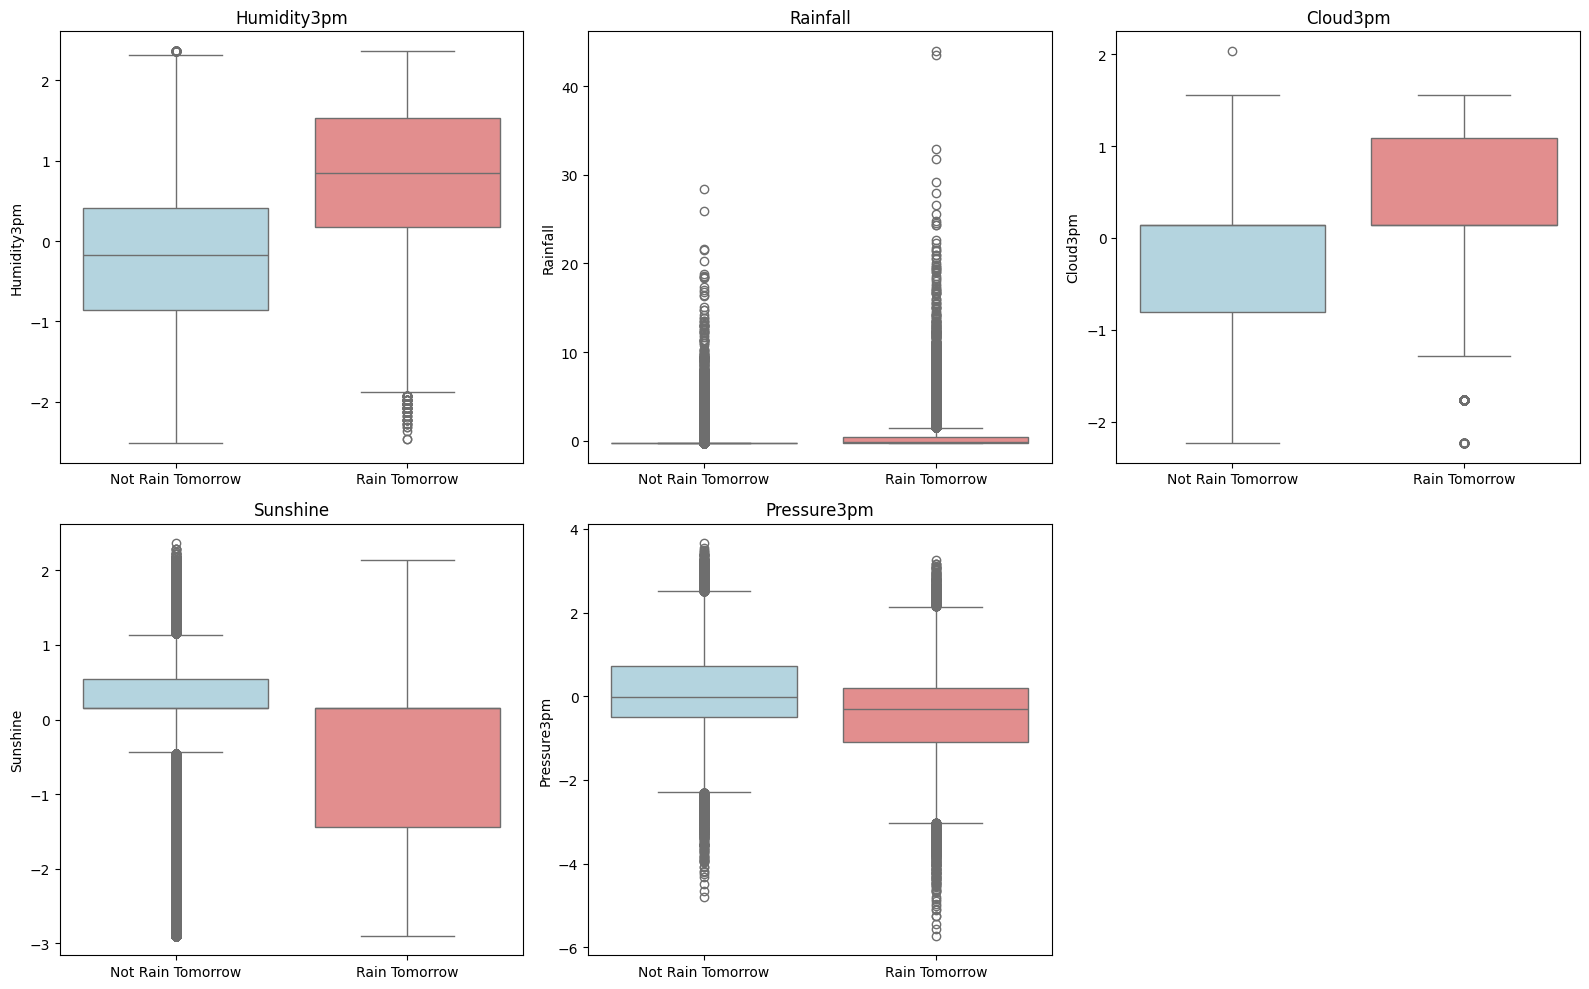

In [77]:
key_features = ['Humidity3pm', 'Rainfall', 'Cloud3pm', 'Sunshine', 'Pressure3pm']

plt.figure(figsize=(16, 10))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='RainTomorrow', y=feature, palette=['lightblue', 'lightcoral'])
    plt.title(f'{feature}')
    plt.xticks([0, 1], ['Not Rain Tomorrow', 'Rain Tomorrow'])
    plt.xlabel('')
plt.tight_layout()
plt.show()

- Humidity3pm (standardization range: -2.52 to 2.37):
  - If tomorrow is not rainy: The distribution is concentrated in the negative range (below the average level) and relatively scattered. The median humidity is approximately 50%.
  - If tomorrow is rainy: The distribution is concentrated in the positive range (above the average level) and rather concentrated. The median humidity is approximately 70%.
  - Insight: The humidity on rainy days is obviously higher than the average level.
------------
- Rainfall (standardization range: -0.28 to 43.98):
  - If tomorrow is not rainy: The distribution is mainly concentrated around 0 with almost no rainfall.
  - If tomorrow is rainy: The distribution is idespread, with many extremely high values.
  - Insight: Days with heavy rainfall are more likely to result in continued rainfall the next day. And extreme rainfall events have a significant impact on the prediction results.
----------
- Could3pm (standardization range: -2.24 to 2.04):
  - If tomorrow is not rainy: The distribution is slightly below the average level and the median is relatively low (approximately 4-5).
  - If tomorrow is rainy: The median is relatively high (approximately 6-7).
  - Insight: Overcast weather is more likely to bring rain.
-----------
- Sunshine (standardization range: -2.90 to 2.36):
  - If tomorrow is not rainy: The distribution is concentrated in the positive range and uniform, and the duration of sunlight is greater than the average level.
  - If tomorrow is rainy: The distribution is mainly in negative values, and the duration of sunlight is significantly shorter.
  - Insight: The duration of sunlight is negatively correlated with the intensity of rainfall, which proves that there is insufficient sunlight on rainy days.
-----------
- Pressure3pm (standardization range: -5.72 to 3.65):
  - If tomorrow is not rainy: The average air pressure is slightly higher.
  - If tomorrow is rainy: The average air pressure is slightly lower.
  - Insight: The pressure difference is relatively small, but the pressure on rainy days tends to be lower than the average level.
----------
Conclusion:

- Humidity3pm: The humidity is significantly higher on rainy afternoons, with a notable difference in the median value.
- Rainfall: The rainfall amounts on rainy days are more widely distributed and have more extreme values, indicating that heavy rainfall is more likely to lead to rainfall the next day.
- Cloud3pm: The cloud coverage is relatively higher on rainy afternoons.
- Sunshine: The duration of sunshine on rainy days is significantly shorter.
- Pressure at 3 pm: The air pressure on rainy days is relatively lower.

### 4.3 Analysis of Seasonal Rainfall Trends

- Analyze the probability of rainfall by month

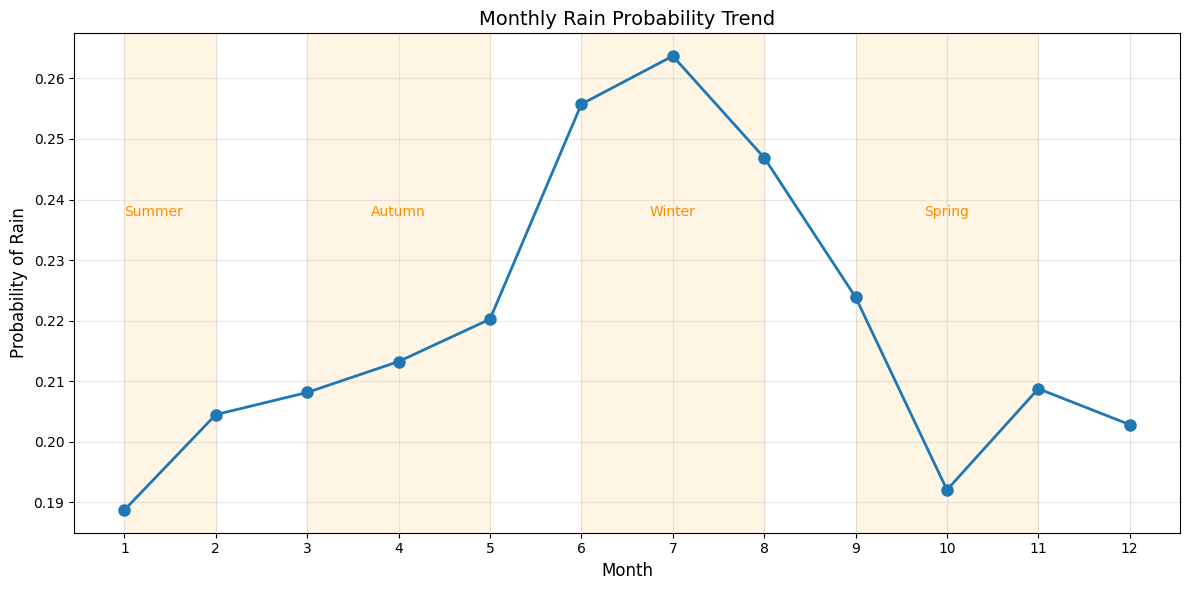

In [78]:
plt.figure(figsize=(12, 6))

if 'Month' in df.columns:
    monthly_rain_prob = df.groupby('Month')['RainTomorrow'].mean()
    plt.plot(monthly_rain_prob.index, monthly_rain_prob.values, marker='o', linewidth=2, markersize=8)
    plt.title('Monthly Rain Probability Trend', fontsize=14)
    plt.ylabel('Probability of Rain', fontsize=12)
    plt.xlabel('Month', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(range(1, 13))
    
    # note the season
    australian_seasons = [
        ('Summer', 12, 2),
        ('Autumn', 3, 5), 
        ('Winter', 6, 8),
        ('Spring', 9, 11)
    ]
    
    for season, start_month, end_month in australian_seasons:
        if start_month > end_month:  
            plt.axvspan(start_month, 12, alpha=0.1, color='orange')
            plt.axvspan(1, end_month, alpha=0.1, color='orange')
            plt.text(1, monthly_rain_prob.max()*0.9, season, ha='left', fontsize=10, color='darkorange')
        else:
            plt.axvspan(start_month, end_month, alpha=0.1, color='orange')
            plt.text((start_month + end_month)/2, monthly_rain_prob.max()*0.9, season, 
                    ha='center', fontsize=10, color='darkorange')
        
plt.tight_layout()
plt.show()

Conclusion:

- The probability of rainfall is the highest in winter months (June to August) and the lowest in summer months (December to February). Spring and autumn are in a transitional period
- It is in line with the climate characteristics of the Southern Hemisphere of Australia (rainy in winter and dry in summer).

### 4.4 Correlation heatmap of featuresCorrelation heatmap of features

- use main features to compute correlation

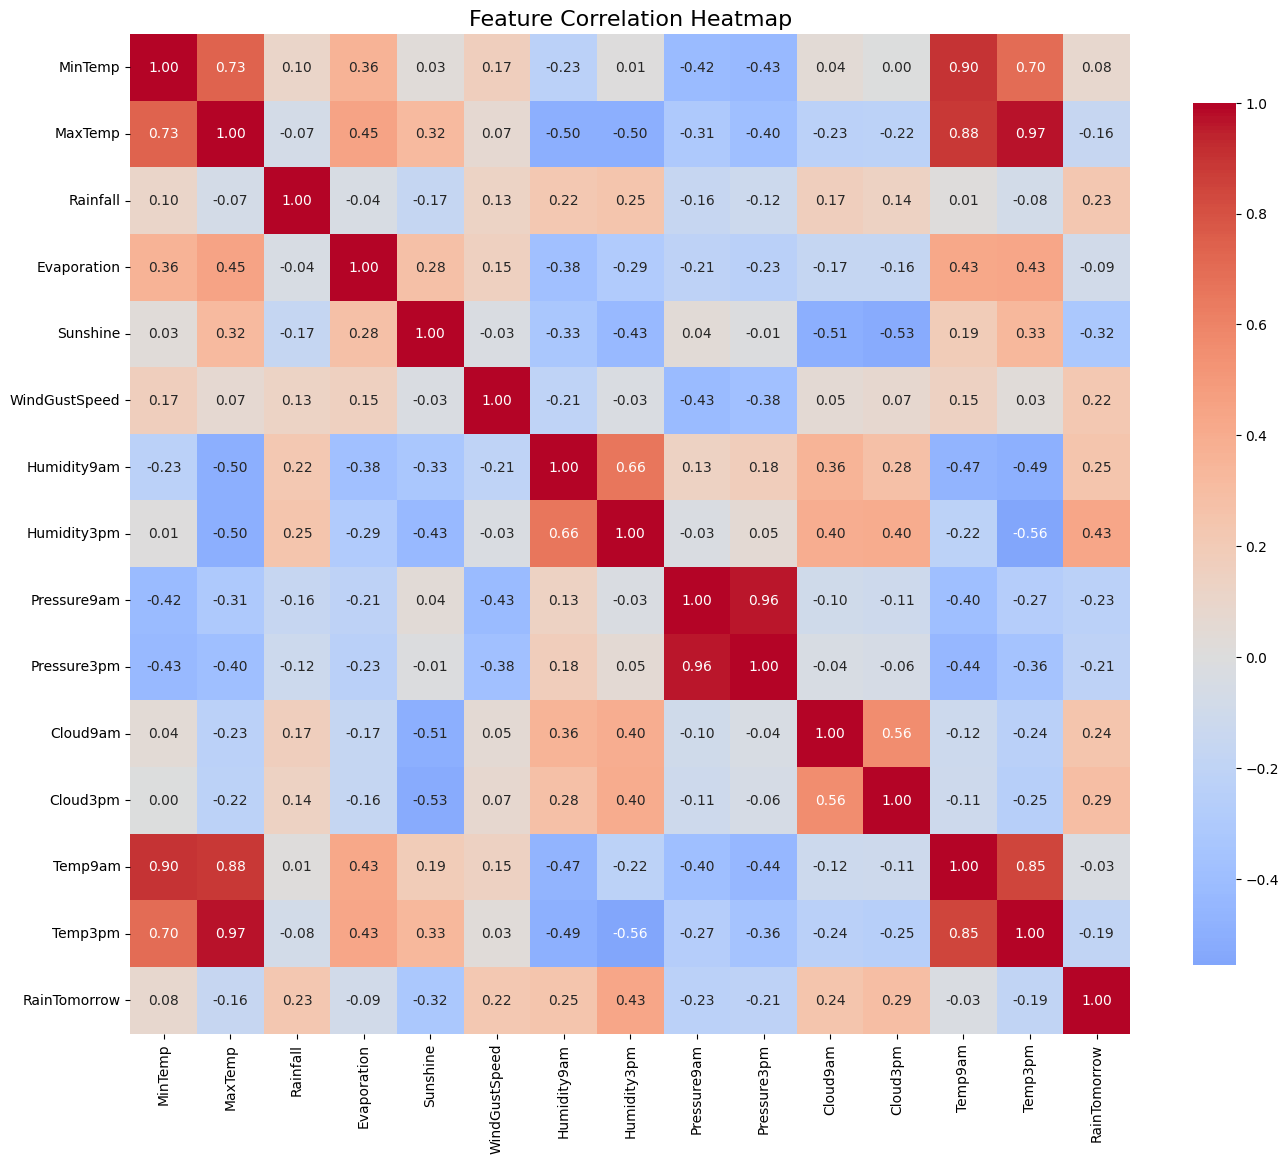

In [79]:
selected_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 
                    'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 
                    'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainTomorrow']

plt.figure(figsize=(14, 12))
correlation_matrix = df[selected_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', 
            square=True, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

Conclusion:

- Strong positive correlation：
  - Temp3pm & MaxTemp (0.97)
  - Pressure3pm & Pressure9am (0.96)
  - Temp9am & MinTemp (0.90)
  - Temp9am & MaxTemp(0.88)
  - Temp9am & Temp3pm (0.85)
  - MaxTemp & MinTemp (0.73)
  - Temp3am & MinTemp (0.70)
  - Humidity9am与Humidity3pm (0.66)
---------
- Strong negative correlation:
  - Temp3am & Humidity3pm (-0.56)
  - Sunshine & Cloud3pm (-0.53)
  - Sunshine & Cloud9am (-0.51)
  - MaxTemp & Humidity9am (-0.50)
  - MaxTemp & Humidity3pm (-0.50)
  - Temp3pm & Humidity9am (-0.49)
  - Temp9am & Humidity9am (-0.47)
  - Temp9am & Pressure3am (-0.44)
  - Sunshine & Humidity3pm (-0.43)
  - Pressure9am & WindGustSpeed (-0.43)
  - Pressure3pm & MinTemp (-0.43)
  - Pressure9am & MinTemp (-0.42)
  - MaxTemp & Pressure3pm (-0.40)
  - Temp9am & Pressure9am (-0.40)
  - Humidity9am & Evaporation (-0.38)
  - Pressure3pm & WindGustSpeed (-0.38)
---------------
- Relevance to 'Rain Tomorrow'
  - Humidity3pm has the strongest positive correlation (0.43)
  - Sunshine has the strongest negative correlation (-0.32)

### 4.5 Joint analysis of temperature and humidity
- Select 1000 samples for plotting to avoid excessive plotting.

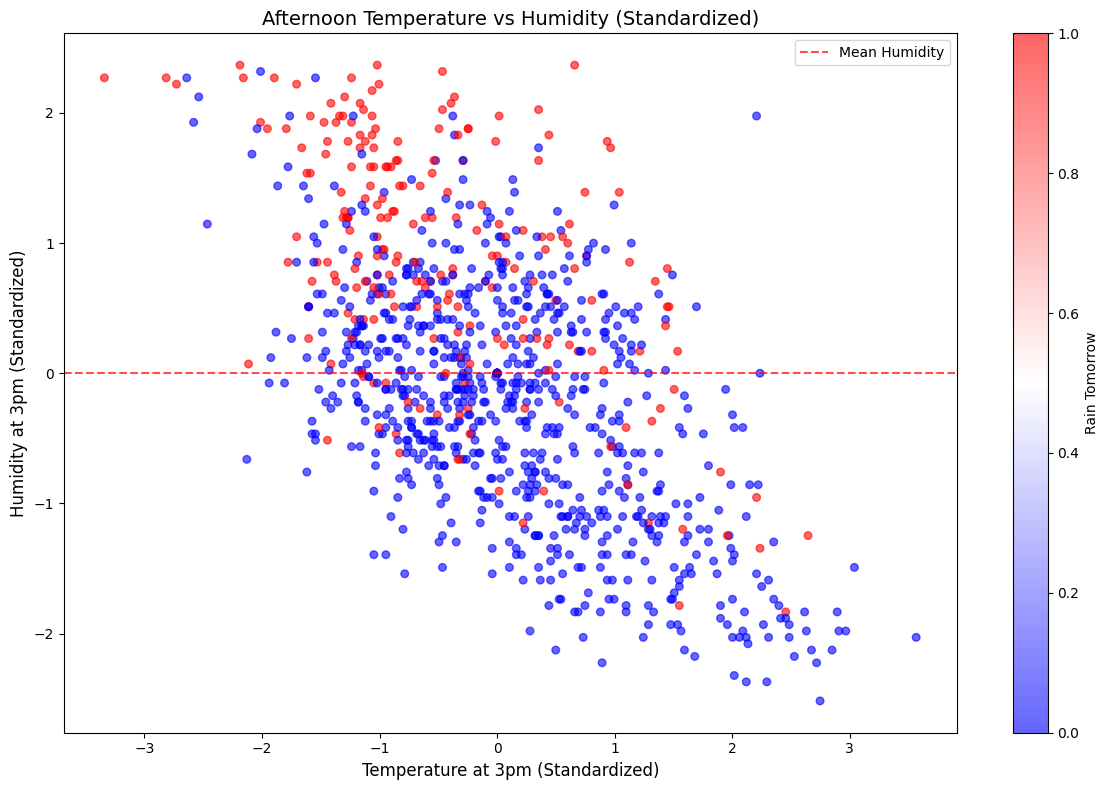

In [80]:
    plt.figure(figsize=(12, 8))
    sample_df = df.sample(1000)
    
    scatter = plt.scatter(sample_df['Temp3pm'], sample_df['Humidity3pm'], 
                         c=sample_df['RainTomorrow'], cmap='bwr', alpha=0.6, s=30)
    plt.colorbar(scatter, label='Rain Tomorrow')
    plt.title('Afternoon Temperature vs Humidity (Standardized)', fontsize=14)
    plt.xlabel('Temperature at 3pm (Standardized)', fontsize=12)
    plt.ylabel('Humidity at 3pm (Standardized)', fontsize=12)
    plt.axhline(y=0, color='red', linestyle='--', alpha=0.7, label='Mean Humidity')
    plt.legend()
    plt.tight_layout()
    plt.show()

Axis of Co-ordinates Explanation：
- Humidity distribution: Positive values indicate higher than average humidity, while negative values indicate lower than average humidity. 
- Temperature distribution: Positive values indicate temperatures higher than the average, while negative values indicate temperatures lower than the average.
------------
Conclusion：

- Humidity influence：In the region with positive humidity, the red dots (indicating rain) are significantly more dense.
- Temperature influence: When the temperature is within a moderate range (close to the average) and combined with high humidity, the probability of rainfall is the highest.


### 4.6 Analysis of Rainfall Probability Based on Geographical Location

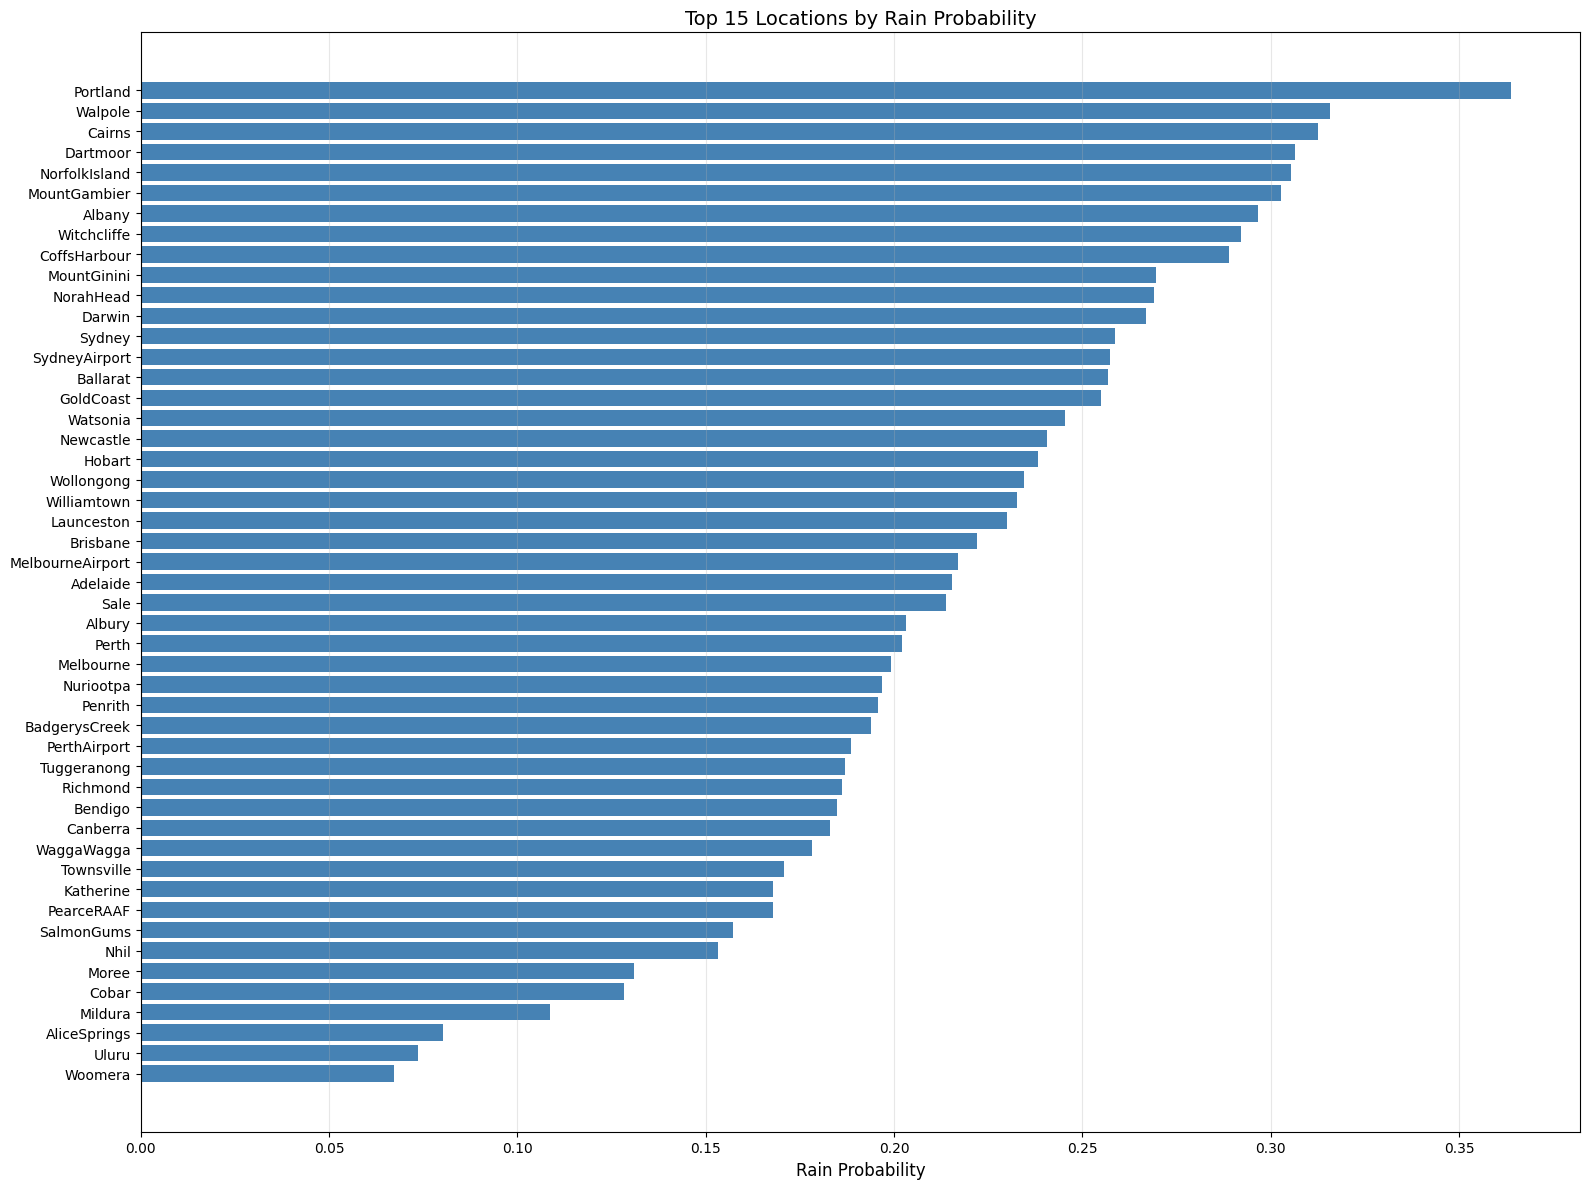

In [81]:
plt.figure(figsize=(16, 12))
location_cols = [col for col in df.columns if col.startswith('Location_')]
location_rain_prob = []

for loc_col in location_cols:
    location_name = loc_col.replace('Location_', '')
    rain_prob = df[df[loc_col] == 1]['RainTomorrow'].mean()
    location_rain_prob.append((location_name, rain_prob))

location_rain_prob.sort(key=lambda x: x[1], reverse=True)
locations, probs = zip(*location_rain_prob)  

plt.barh(range(len(locations)), probs, color='steelblue')
plt.yticks(range(len(locations)), locations)
plt.xlabel('Rain Probability', fontsize=12)
plt.title('Top 15 Locations by Rain Probability', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


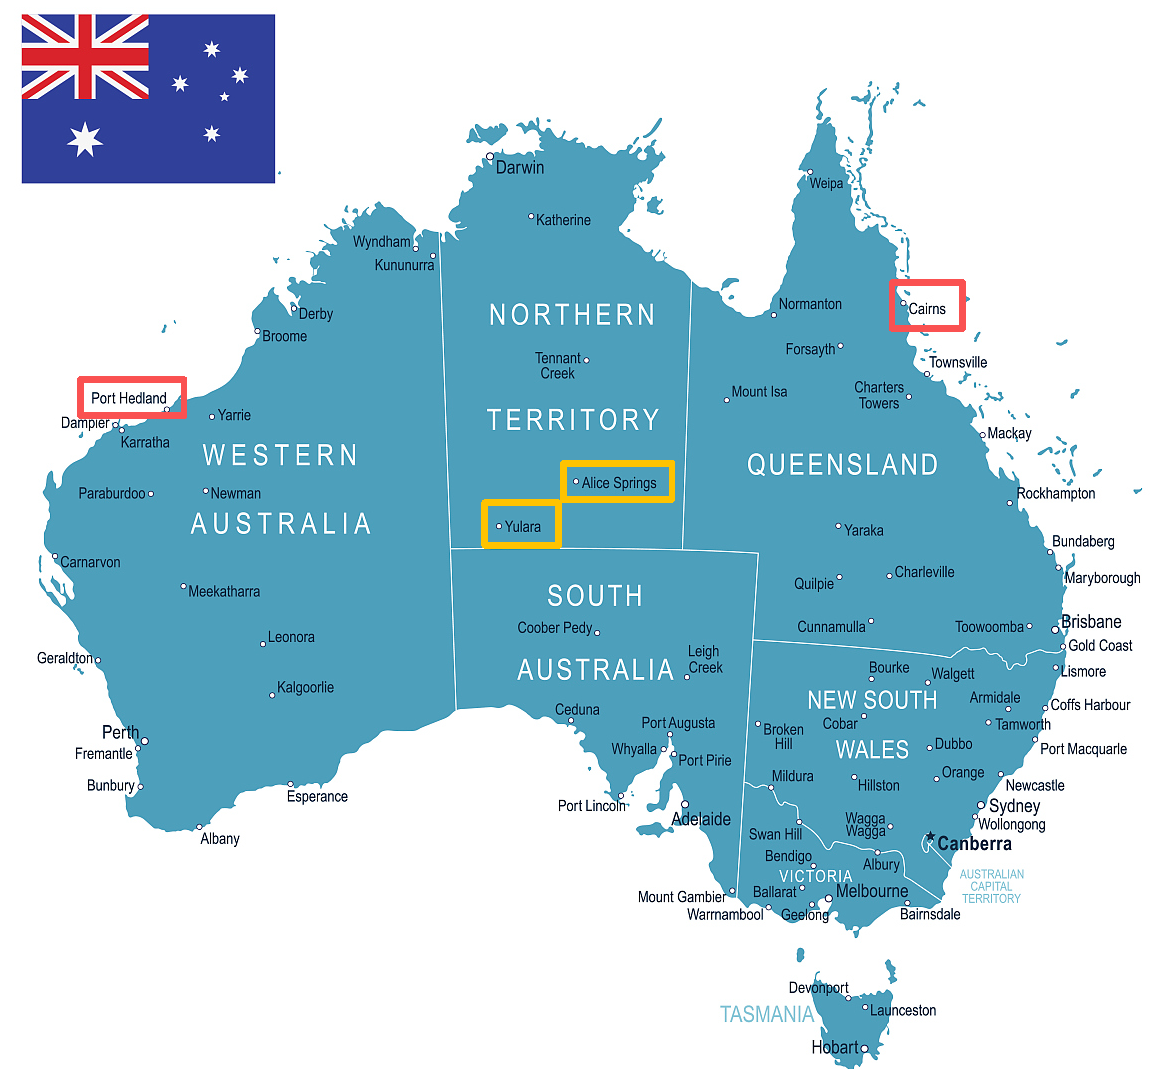

In [114]:
from IPython.display import HTML
import base64

with open("Aus_Location.png", "rb") as f:
    data = f.read()
    data_url = "data:image/png;base64," + base64.b64encode(data).decode()

HTML(f'<img src="{data_url}" width="600">')


(Some areas are not shown on the map due to map and translation reasons, so I selected a few examples for analysis.)

- Portland with the highest precipitation (Port Hedland marked with a red frame on the map) is located on the west coast, and its precipitation may be influenced by ocean currents.
- Cairns with the third highest precipitation (Cairns marked with a red frame on the map) is located on the east coast and has a tropical rainforest climate.
- Uluru (Yulara marked with a yellow frame on the map) and AliceSprings (Alice Springs marked with a yellow frame on the map), which have the second and third lowest precipitation, are both located in the central region and have a tropical desert climate.
----------
Conclusion：

- Coastal areas generally experience high rainfall, with the majority of the top 15 locations being coastal cities.
- Topography has a significant influence: mountainous areas such as Mount Gambier have a higher probability of rainfall.
- There are differences between climate zones: tropical and maritime climate regions experience more frequent rainfall. Although tropical regions have high total rainfall, its distribution is uneven.

## 5.  Attribute Selection

### 5.1 Feature Importance Analysis
- use random forest to analyse the importance of the features

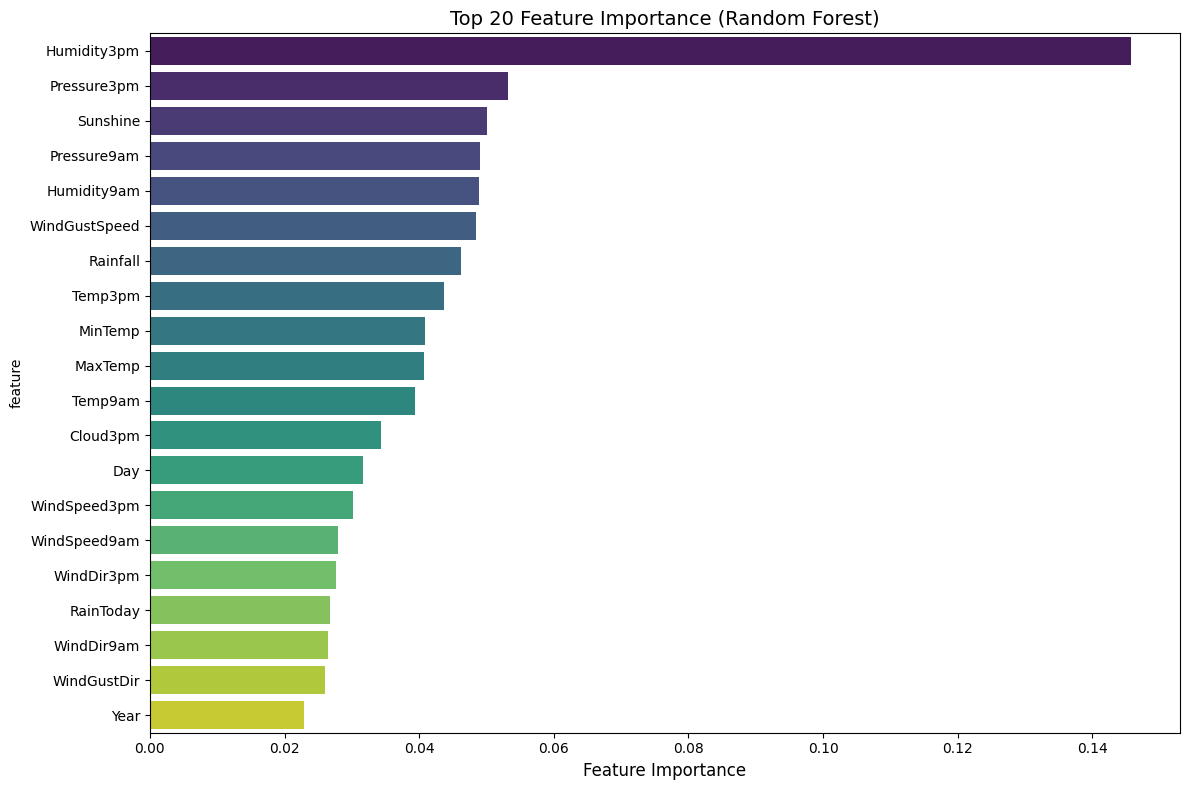

The top 10 most important features:


,feature,importance
12,Humidity3pm,0.145725
14,Pressure3pm,0.053184
4,Sunshine,0.050046
13,Pressure9am,0.049059
11,Humidity9am,0.048942
6,WindGustSpeed,0.048459
2,Rainfall,0.046195
18,Temp3pm,0.043754
0,MinTemp,0.040823
1,MaxTemp,0.040647


In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X, y)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
top_features = feature_importance.head(20)
sns.barplot(data=top_features, x='importance', y='feature', palette='viridis')
plt.title('Top 20 Feature Importance (Random Forest)', fontsize=14)
plt.xlabel('Feature Importance', fontsize=12)
plt.tight_layout()
plt.show()

print("The top 10 most important features:")
display(feature_importance.head(10))

### 5.2 Correlation Analysis
- compute the correlation with the target variable

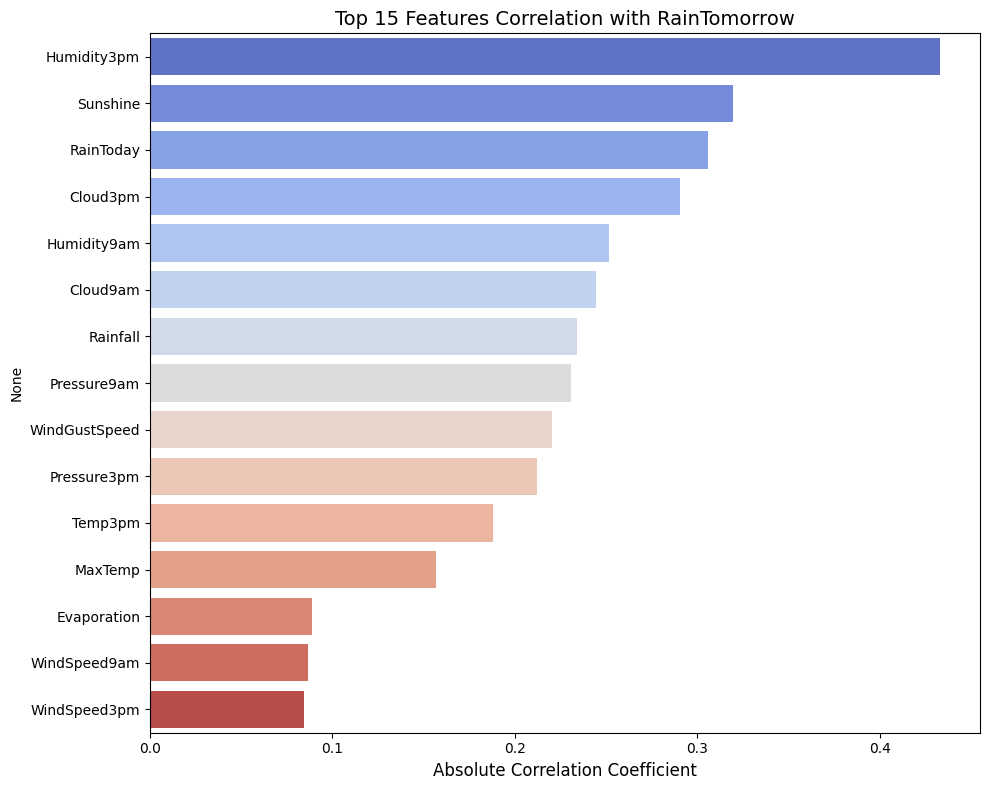

The top 15 features with the highest correlation to the target variable:


,RainTomorrow
Humidity3pm,0.433179
Sunshine,0.319412
RainToday,0.305744
Cloud3pm,0.290610
Humidity9am,0.251470
Cloud9am,0.244242
Rainfall,0.233900
Pressure9am,0.230950
WindGustSpeed,0.220144
Pressure3pm,0.211952


In [84]:
target_correlation = df.corr()['RainTomorrow'].abs().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
top_corr_features = target_correlation[1:16]  # Exclude the target variable itself
sns.barplot(x=top_corr_features.values, y=top_corr_features.index, palette='coolwarm')
plt.title('Top 15 Features Correlation with RainTomorrow', fontsize=14)
plt.xlabel('Absolute Correlation Coefficient', fontsize=12)
plt.tight_layout()
plt.show()

print("The top 15 features with the highest correlation to the target variable:")
display(pd.DataFrame(top_corr_features.head(15)))

### 5.3 Recursive feature elimination (RFE)
- Recursive feature elimination using cross-validation

use 10000 data to continue RFE


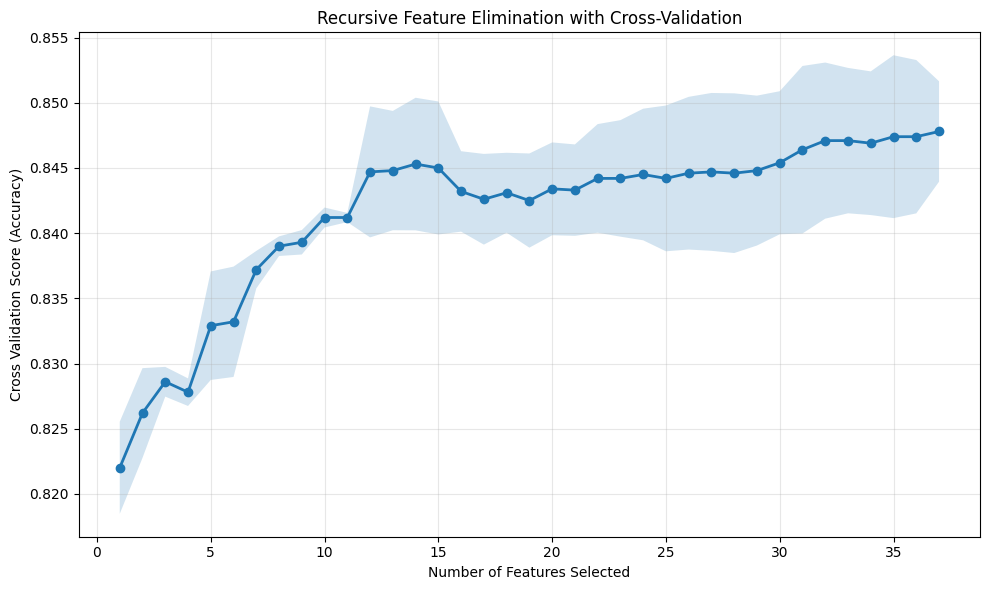

The best score of cross-validation: 0.8478
feature selected by REF: (number: 73)
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'Year', 'Month', 'Day', 'Season', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Locat

In [85]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
import numpy as np

sample_size = 10000  # random sample, or the whole dataset is too large
if len(X) > sample_size:
    from sklearn.model_selection import train_test_split
    X_sample, _, y_sample, _ = train_test_split(
        X, y, train_size=sample_size, stratify=y, random_state=42
    )
else:
    X_sample, y_sample = X, y

print(f"use {len(X_sample)} data to continue RFE")

estimator = LogisticRegression(max_iter=500, random_state=42, solver='liblinear')
rfecv = RFECV(estimator=estimator, step=2, cv=3, scoring='accuracy', n_jobs=1) 

rfecv.fit(X_sample, y_sample)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), 
         rfecv.cv_results_['mean_test_score'], marker='o', linewidth=2)
plt.fill_between(range(1, len(rfecv.cv_results_['mean_test_score']) + 1),
                 rfecv.cv_results_['mean_test_score'] - rfecv.cv_results_['std_test_score'],
                 rfecv.cv_results_['mean_test_score'] + rfecv.cv_results_['std_test_score'],
                 alpha=0.2)
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross Validation Score (Accuracy)')
plt.title('Recursive Feature Elimination with Cross-Validation')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

selected_features = X.columns[rfecv.support_]
print(f"The best score of cross-validation: {rfecv.cv_results_['mean_test_score'].max():.4f}")
print(f"feature selected by REF: (number: {len(selected_features)})")
print(selected_features.tolist())

### 5.4 Comparsion

In [86]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_features(X_train, X_test, y_train, y_test, feature_set_name):
    model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba)
    }
    
    print(f"\n{feature_set_name} performance:")
    print(f"  feature numbers: {X_train.shape[1]}")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    
    return metrics

# divide
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# compare
results = {}

results['all_features'] = evaluate_features(X_train, X_test, y_train, y_test, "all features")

# The Top 15 Most Important Characteristics
top_15_features = feature_importance.head(15)['feature'].tolist()
results['top_15'] = evaluate_features(X_train[top_15_features], X_test[top_15_features], 
                                     y_train, y_test, "top 15 most important")

# The selected features by RFE
if len(selected_features) > 0:
    results['rfe_features'] = evaluate_features(X_train[selected_features], X_test[selected_features],
                                               y_train, y_test, "selected by RFE")

# Based on the characteristic of correlation (correlation coefficient > 0.05)
corr_features = target_correlation[target_correlation > 0.05].index.tolist()
if 'RainTomorrow' in corr_features:
    corr_features.remove('RainTomorrow')
if len(corr_features) > 0:
    results['corr_features'] = evaluate_features(X_train[corr_features], X_test[corr_features],
                                                y_train, y_test, "high correlation")


all features performance:
  feature numbers: 73
  accuracy: 0.8614
  precision: 0.7811
  recall: 0.5109
  f1: 0.6177
  roc_auc: 0.8906

top 15 most important performance:
  feature numbers: 15
  accuracy: 0.8563
  precision: 0.7582
  recall: 0.5053
  f1: 0.6064
  roc_auc: 0.8787

selected by RFE performance:
  feature numbers: 73
  accuracy: 0.8614
  precision: 0.7811
  recall: 0.5109
  f1: 0.6177
  roc_auc: 0.8906

high correlation performance:
  feature numbers: 19
  accuracy: 0.8573
  precision: 0.7611
  recall: 0.5087
  f1: 0.6098
  roc_auc: 0.8813


Explanation：

- REF selected all 73 features which means it thinks all features are inportant, so its choice is invaild.
- All methods get recall value around 0.51, which means nearly half of the actual rainfall was not predicted.
- The Top15 feature set uses only 15 features (reducing by 80%), but the performance drops very little.
- The accuracy rates of all methods are above 0.75, and they have a relatively high degree of confidence in predicting rain.
- Using all features will get best performance, but the calculation expense is also the highest.
-------
Conclusion:

- **Choose Top 15 most important features**
- Reasons:
  - Reduce the number of features by approximately 80%, significantly improving the training speed.
  - The performance decline is very slight and within the acceptable range.
    - The accuracy rate decreased by 0.51%
    - The AUC dropped by 1.19%
    - The F1 score decreased by 1.13%.

## 6.  Model Selection and Experiments

- use the top 15 most important features to evaluate F1 score, AUC, accuracy, precision and recall

In [87]:
import warnings
warnings.filterwarnings('ignore')

top_15_features = [
    'Humidity3pm', 'Sunshine', 'RainToday', 'Cloud3pm', 'Humidity9am',
    'Cloud9am', 'Rainfall', 'Pressure9am', 'WindGustSpeed', 'Pressure3pm',
    'Temp3pm', 'MaxTemp', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm'
]

X_selected = X[top_15_features]
X_filled = X_selected.fillna(X_selected.mean())

print(f"feature number: {len(top_15_features)}")
print(f"data shape: {X_filled.shape}")

feature number: 15
data shape: (145460, 15)


**Data Preparation**

In [88]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# divide the training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_filled, y, test_size=0.2, random_state=42, stratify=y
)

# standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"training set: {X_train_scaled.shape}, test set: {X_test_scaled.shape}")
print(f"distribution of training set categories:\n{y_train.value_counts(normalize=True)}")

training set: (116368, 15), test set: (29092, 15)
distribution of training set categories:
RainTomorrow
0    0.78085
1    0.21915
Name: proportion, dtype: float64


### 6.1 Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for logistic regression
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'class_weight': [None, 'balanced']
}

lr_grid = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),
    lr_param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='f1',
    n_jobs=-1
)

lr_grid.fit(X_train_scaled, y_train)

print("optimal parameters of logistic regression:", lr_grid.best_params_)
print("best cross-validation F1 score of logistic regression:", lr_grid.best_score_)

# evaluate on test set
lr_best = lr_grid.best_estimator_
y_pred_lr = lr_best.predict(X_test_scaled)
y_pred_proba_lr = lr_best.predict_proba(X_test_scaled)[:, 1]

optimal parameters of logistic regression: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
best cross-validation F1 score of logistic regression: 0.6091780546323875


### 6.2 Random Forest

In [90]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

rf_random = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    {
        'n_estimators': randint(50, 200),
        'max_depth': [10, 20, None],
        'min_samples_split': randint(2, 10),
        'min_samples_leaf': randint(1, 4),
        'class_weight': [None, 'balanced']
    },
    n_iter=20,   
    scoring='f1',
    cv=3,
    random_state=42,
    n_jobs=-1
)

rf_random.fit(X_train, y_train)

print("optimal parameters of random forest:", rf_random.best_params_)
print("best cross-validation F1 score of random forest:", rf_random.best_score_)

rf_best = rf_random.best_estimator_
y_pred_rf = rf_best.predict(X_test)
y_pred_proba_rf = rf_best.predict_proba(X_test)[:, 1]

optimal parameters of random forest: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 100}
best cross-validation F1 score of random forest: 0.6351634909290919


### 6.3 Gradient Boosting

In [91]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import randint, uniform

gb_random = RandomizedSearchCV(
    GradientBoostingClassifier(random_state=42, n_estimators=50),
    {
        'n_estimators': randint(50, 200),
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'subsample': [0.8, 1.0]
    },
    n_iter=10,       
    scoring='f1',
    cv=3,
    random_state=42,
    n_jobs=-1
)

gb_random.fit(X_train, y_train)

print("optimal parameters of gradient boosting:", gb_random.best_params_)
print("best cross-validation F1 score of random forest:", gb_random.best_score_)

gb_best = gb_random.best_estimator_
y_pred_gb = gb_best.predict(X_test)
y_pred_proba_gb = gb_best.predict_proba(X_test)[:, 1]


optimal parameters of gradient boosting: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 124, 'subsample': 0.8}
best cross-validation F1 score of random forest: 0.6035081951731315


### 6.4 kNN

In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from scipy.stats import randint


knn_param_dist = {
    'n_neighbors': randint(3, 20),   
    'weights': ['uniform', 'distance'],  
    'p': [1, 2] 
}


knn_random = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=knn_param_dist,
    n_iter=20,       
    scoring='f1',
    cv=3,
    random_state=42,
    n_jobs=-1
)

X_small, _, y_small, _ = train_test_split(X_train_scaled, y_train, test_size=0.5, random_state=42)
knn_random.fit(X_small, y_small)
#knn_random.fit(X_train_scaled, y_train)


print("optimal parameters for kNN:", knn_random.best_params_)
print("best cross-validation F1 score for kNN:", knn_random.best_score_)

knn_best = knn_random.best_estimator_
y_pred_knn = knn_best.predict(X_test_scaled)
y_pred_proba_knn = knn_best.predict_proba(X_test_scaled)[:, 1]  

optimal parameters for kNN: {'n_neighbors': 14, 'p': 1, 'weights': 'distance'}
best cross-validation F1 score for kNN: 0.5493943594350622


### 6.5 Decision Tree

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from scipy.stats import randint

dt_param_dist = {
    'max_depth': randint(3, 20),            
    'min_samples_split': randint(2, 10),    
    'min_samples_leaf': randint(1, 5),      
    'criterion': ['gini', 'entropy'],       
    'class_weight': [None, 'balanced']   
}


dt_random = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=dt_param_dist,
    n_iter=20,    
    scoring='f1',
    cv=3,
    random_state=42,
    n_jobs=-1
)


dt_random.fit(X_train, y_train)

print("optimal parameters for Decision Tree:", dt_random.best_params_)
print("best cross-validation F1 score:", dt_random.best_score_)


dt_best = dt_random.best_estimator_
y_pred_dt = dt_best.predict(X_test)
y_pred_proba_dt = dt_best.predict_proba(X_test)[:, 1]  

optimal parameters for Decision Tree: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 3}
best cross-validation F1 score: 0.5898061460978522


### 6.6 Model Comparasion

,Model,CV F1,Test F1,Accuracy,AUC,Precision,Recall,|Prec-Rec|
2,Random Forest,0.6352,0.6446,0.8460,0.8797,0.6520,0.6373,0.0146
3,Gradient Boosting,0.6035,0.6149,0.8556,0.8779,0.7395,0.5263,0.2132
1,Logistic Regression,0.6092,0.6097,0.7855,0.8625,0.5070,0.7644,0.2574
5,Decision Tree,0.5898,0.5942,0.7716,0.8424,0.4865,0.7631,0.2766
4,KNN,0.5494,0.5622,0.8428,0.8481,0.7211,0.4607,0.2604


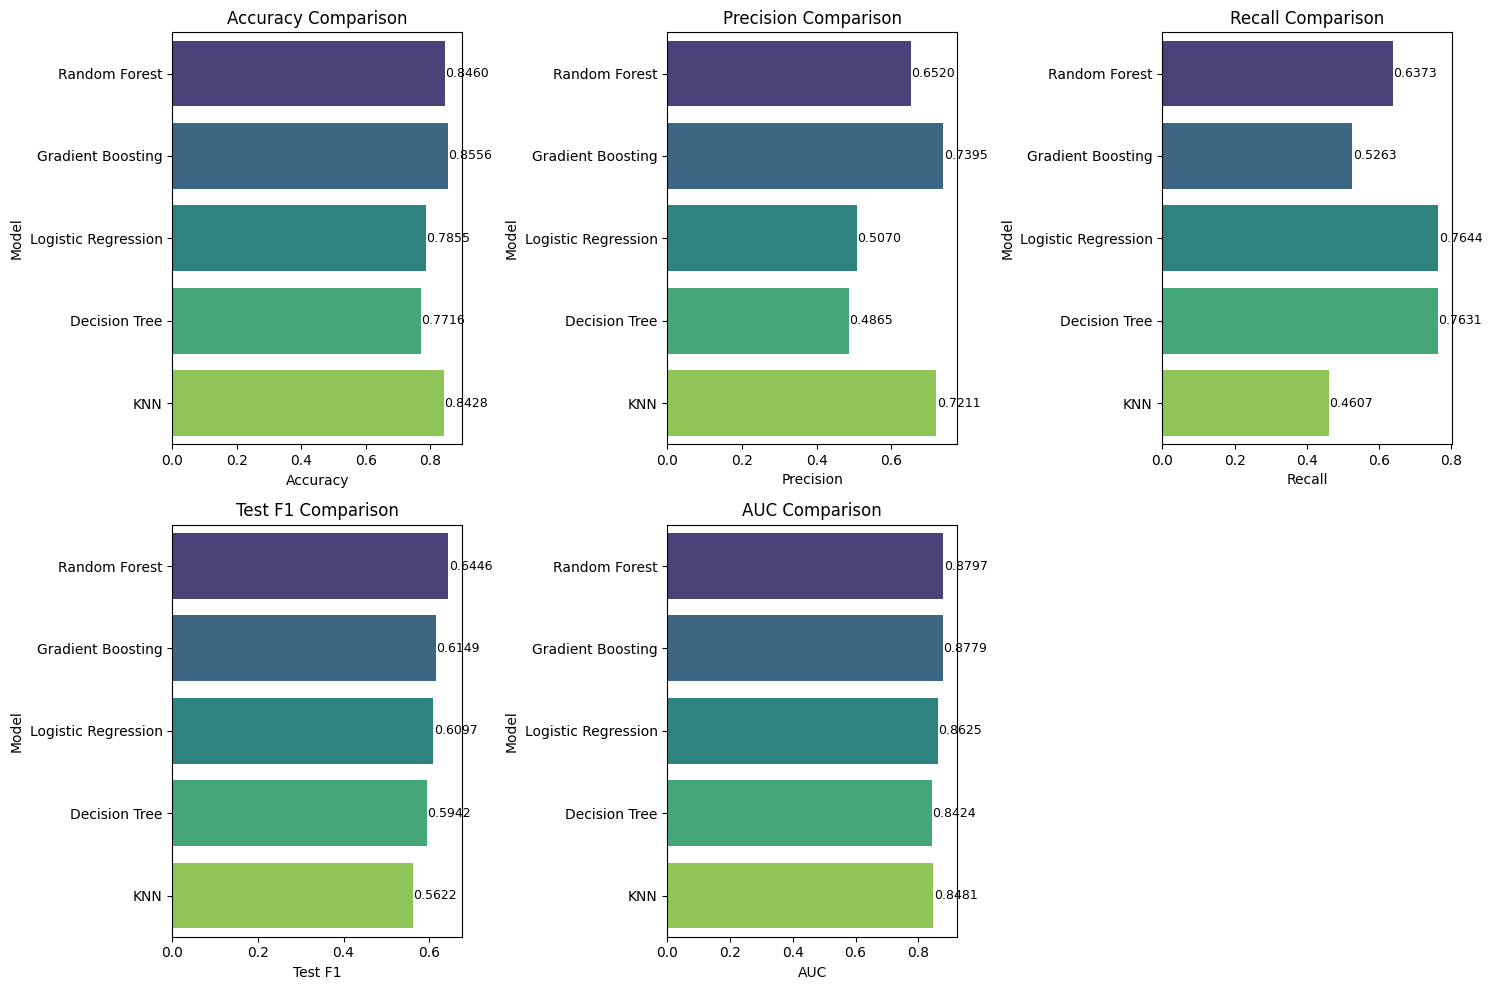

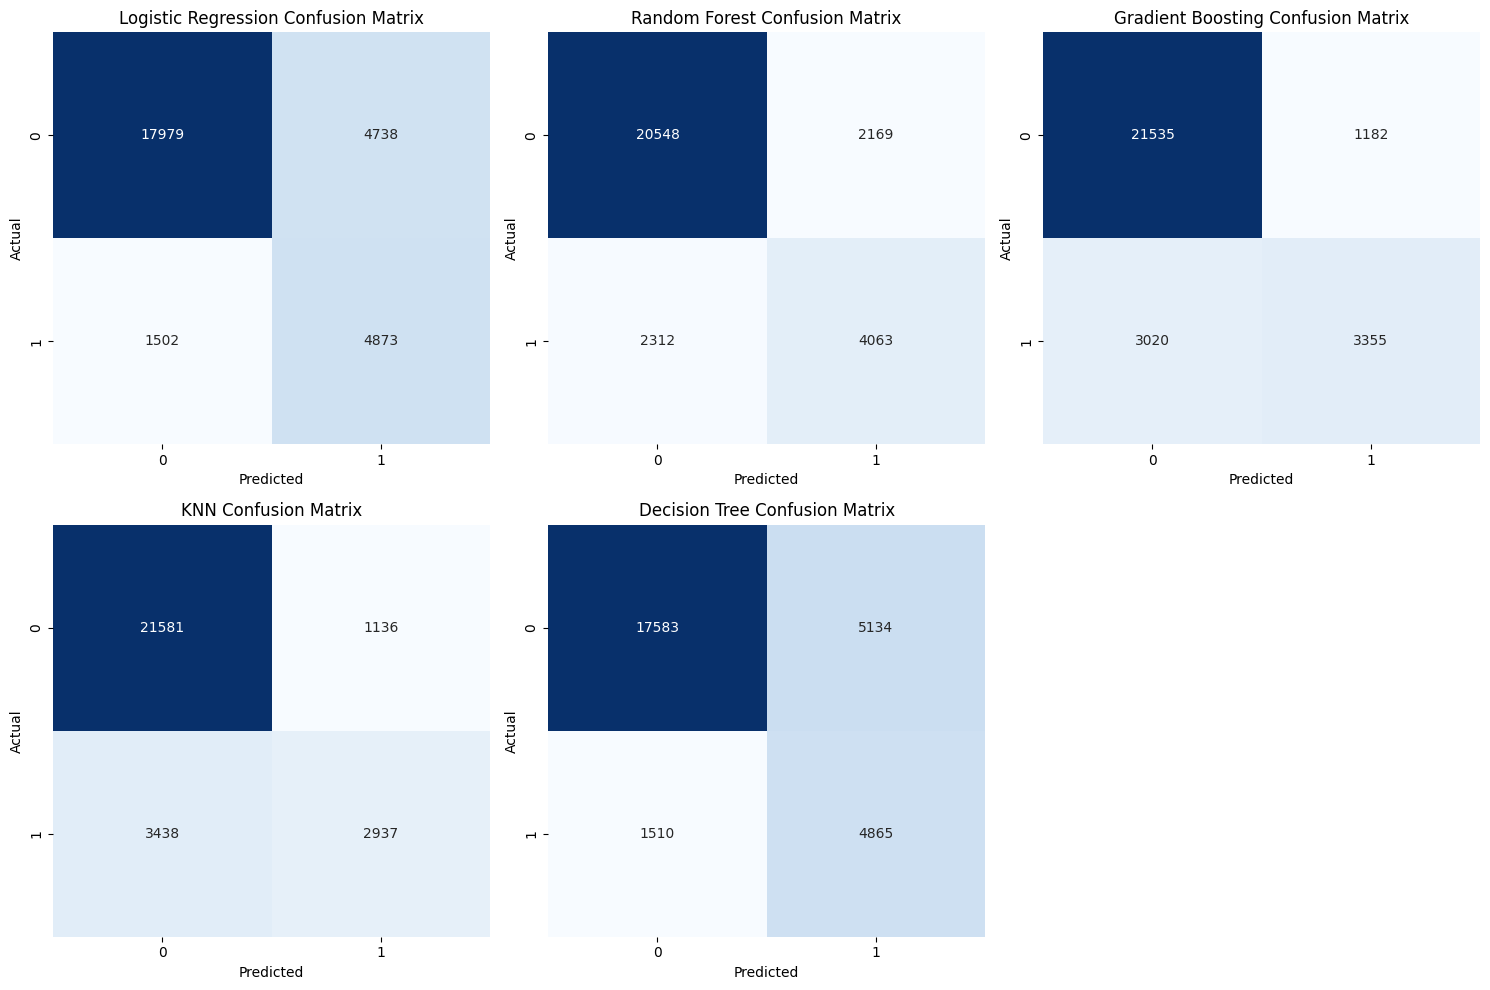

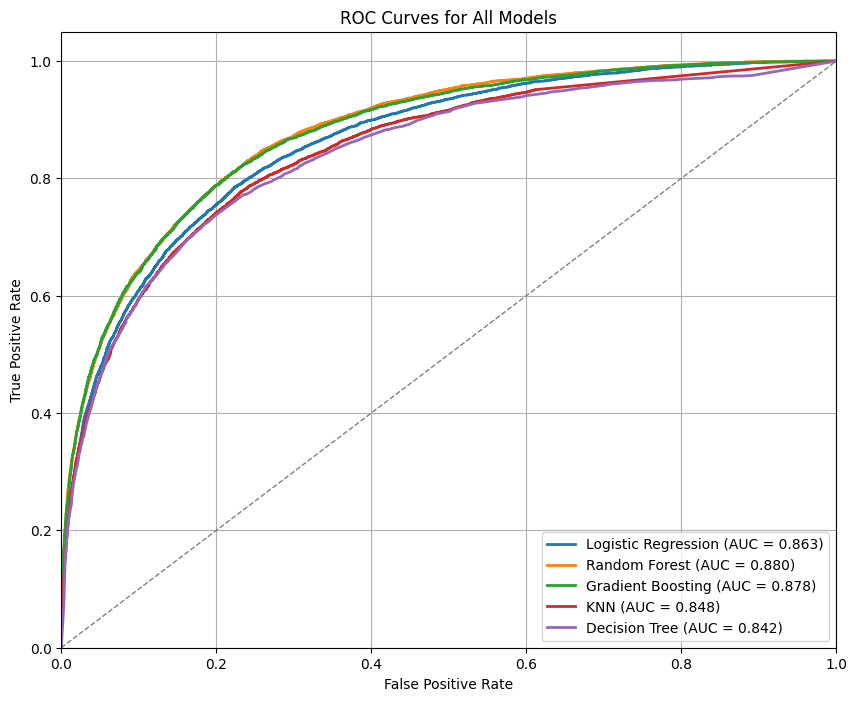

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

models = {
    'Logistic Regression': (y_pred_lr, y_pred_proba_lr, lr_grid.best_score_),
    'Random Forest': (y_pred_rf, y_pred_proba_rf, rf_random.best_score_),
    'Gradient Boosting': (y_pred_gb, y_pred_proba_gb, gb_random.best_score_),
    'KNN': (y_pred_knn, y_pred_proba_knn, knn_random.best_score_),
    'Decision Tree': (y_pred_dt, y_pred_proba_dt, dt_random.best_score_)
}

results = []
conf_matrices = {}

for name, (y_pred, y_pred_proba, cv_f1) in models.items():
    test_f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    results.append({
        'Model': name,
        'CV F1': round(cv_f1, 4),    
        'Test F1': round(test_f1, 4), 
        'Accuracy': round(accuracy_score(y_test, y_pred), 4),
        'AUC': round(roc_auc_score(y_test, y_pred_proba), 4),
        'Precision': round(precision_score(y_test, y_pred), 4),
        'Recall': round(recall_score(y_test, y_pred), 4),
        '|Prec-Rec|': round(abs(precision - recall), 4)
    })
    conf_matrices[name] = confusion_matrix(y_test, y_pred)

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Test F1', ascending=False)
results_df.index = results_df.index + 1
display(results_df)

# visual comparasion
plt.figure(figsize=(15, 10))

metrics = ['Accuracy', 'Precision', 'Recall', 'Test F1', 'AUC']
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightpink']

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    sns.barplot(data=results_df, x=metric, y='Model', palette='viridis')
    plt.title(f'{metric} Comparison', fontsize=12)
    plt.xlabel(metric, fontsize=10)
    
    for j, v in enumerate(results_df[metric]):
        plt.text(v + 0.001, j, f'{v:.4f}', va='center', fontsize=9)


plt.tight_layout()
plt.show()

# confusion matrix
plt.figure(figsize=(15, 10))
for i, (name, cm) in enumerate(conf_matrices.items(), 1):
    plt.subplot(2, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} Confusion Matrix', fontsize=12)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# ROC curves
plt.figure(figsize=(10, 8))
for name, (y_pred, y_pred_proba, _) in models.items():
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Conclusion:

- The best model: **Random Forest**
- Reason：
    - Random Forest gets highest F1 score both in crossvalidation(0.6352) and testset(0.6446).
    - It also gets the highest AUC value(0.8797), and the ROC curves image can also show the curve of Random Forest is closer to the upper left corner.
    - The accuracy is the second highest value(0.8460), while it is only a little lower than the first place(Gradient Boosting, 0.8556).
    - Although its precision and recall is not very high, its value of |precision-recall| is the minimum(0.0146), which means it perform the best in a balanced manner, will not overfit or underfit

## 7.  Final Model Training

-  Use the optimal hyperparameters to train the final model on the complete training set

### 7.1 optimal hyperarameters

In [95]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, precision_recall_curve

best_rf_params = {
    'class_weight': 'balanced',
    'max_depth': 20,
    'min_samples_leaf': 3,
    'min_samples_split': 7,
    'n_estimators': 100,
    'random_state': 42,
    'n_jobs': -1
}

final_model = RandomForestClassifier(**best_rf_params)

print("best_rf_params:")
for param, value in best_rf_params.items():
    if param != 'n_jobs':  
        print(f"  {param}: {value}")

best_rf_params:
  class_weight: balanced
  max_depth: 20
  min_samples_leaf: 3
  min_samples_split: 7
  n_estimators: 100
  random_state: 42


Cross-validation results (5-fold):


,Metric,Mean,Std
0,F1,0.6389,0.0039
1,Accuracy,0.8447,0.0013
2,Precision,0.6512,0.0031
3,Recall,0.6271,0.0067
4,AUC,0.8765,0.0018


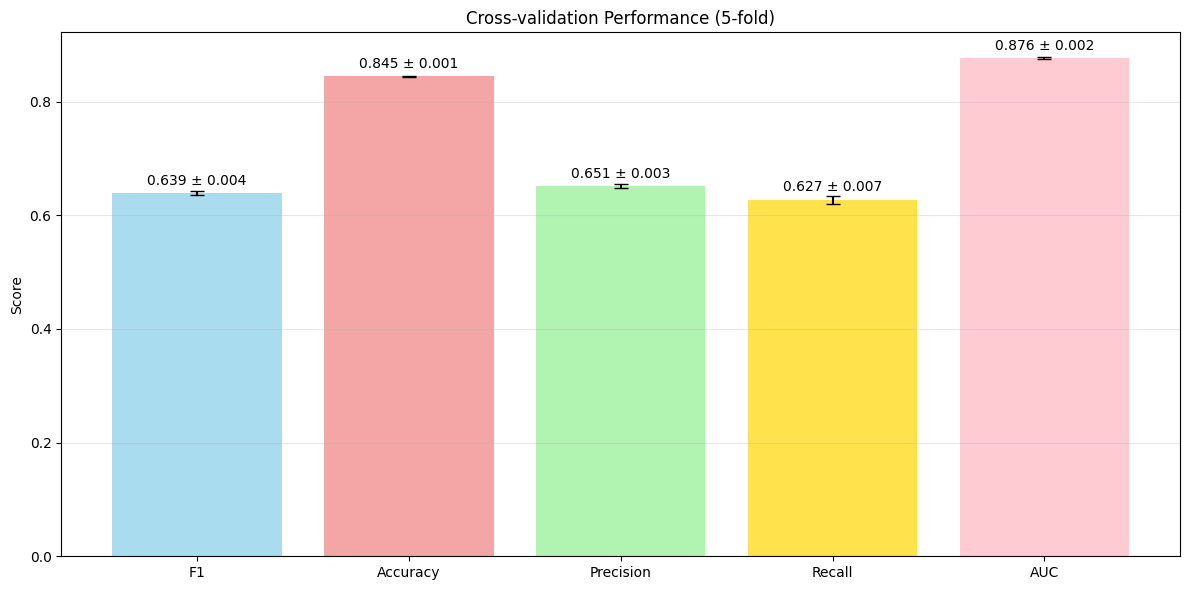

In [96]:
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores_f1 = cross_val_score(final_model, X_train, y_train, 
                              cv=cv_strategy, scoring='f1', n_jobs=-1)
cv_scores_accuracy = cross_val_score(final_model, X_train, y_train, 
                                   cv=cv_strategy, scoring='accuracy', n_jobs=-1)
cv_scores_precision = cross_val_score(final_model, X_train, y_train, 
                                    cv=cv_strategy, scoring='precision', n_jobs=-1)
cv_scores_recall = cross_val_score(final_model, X_train, y_train, 
                                 cv=cv_strategy, scoring='recall', n_jobs=-1)
cv_scores_auc = cross_val_score(final_model, X_train, y_train, 
                              cv=cv_strategy, scoring='roc_auc', n_jobs=-1)

cv_results = {
    'F1': cv_scores_f1,
    'Accuracy': cv_scores_accuracy,
    'Precision': cv_scores_precision,
    'Recall': cv_scores_recall,
    'AUC': cv_scores_auc
}

print("Cross-validation results (5-fold):")
cv_summary = pd.DataFrame({
    'Metric': ['F1', 'Accuracy', 'Precision', 'Recall', 'AUC'],
    'Mean': [np.mean(cv_scores_f1), np.mean(cv_scores_accuracy), 
             np.mean(cv_scores_precision), np.mean(cv_scores_recall), 
             np.mean(cv_scores_auc)],
    'Std': [np.std(cv_scores_f1), np.std(cv_scores_accuracy),
            np.std(cv_scores_precision), np.std(cv_scores_recall),
            np.std(cv_scores_auc)]
}).round(4)

display(cv_summary)

plt.figure(figsize=(12, 6))
metrics_names = list(cv_results.keys())
metrics_means = [np.mean(scores) for scores in cv_results.values()]
metrics_stds = [np.std(scores) for scores in cv_results.values()]

x_pos = np.arange(len(metrics_names))
plt.bar(x_pos, metrics_means, yerr=metrics_stds, capsize=5, 
        color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightpink'], alpha=0.7)
plt.xticks(x_pos, metrics_names)
plt.ylabel('Score')
plt.title('Cross-validation Performance (5-fold)')
plt.grid(axis='y', alpha=0.3)

for i, (mean, std) in enumerate(zip(metrics_means, metrics_stds)):
    plt.text(i, mean + 0.01, f'{mean:.3f} ± {std:.3f}', 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

The model performed stably in the cross-validation, with a very small standard deviation, indicating that the model has good generalization ability.

In [97]:
# train final model
final_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred = final_model.predict(X_test)
y_test_pred_proba = final_model.predict_proba(X_test)[:, 1]

test_metrics = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'Precision': precision_score(y_test, y_test_pred),
    'Recall': recall_score(y_test, y_test_pred),
    'F1': f1_score(y_test, y_test_pred),
    'AUC': roc_auc_score(y_test, y_test_pred_proba)
}


# Compare cross-validation and test set performance
comparison_df = pd.DataFrame({
    'Metric': cv_summary['Metric'],
    'CV_Mean': cv_summary['Mean'],
    'Test_Score': [test_metrics[metric] for metric in cv_summary['Metric']],
    'Difference': [test_metrics[metric] - mean for metric, mean in zip(cv_summary['Metric'], cv_summary['Mean'])]
}).round(4)

print("Cross-validation vs Testset performance comparison:")
display(comparison_df)

Cross-validation vs Testset performance comparison:


,Metric,CV_Mean,Test_Score,Difference
0,F1,0.6389,0.6446,0.0057
1,Accuracy,0.8447,0.8460,0.0013
2,Precision,0.6512,0.6520,0.0008
3,Recall,0.6271,0.6373,0.0102
4,AUC,0.8765,0.8797,0.0032


The test set indicators are slightly higher than the average value of cross-validation, indicating that the model has not overfit and its performance is stable.

Classification Report:
              precision    recall  f1-score   support

     No Rain       0.90      0.90      0.90     22717
        Rain       0.65      0.64      0.64      6375

    accuracy                           0.85     29092
   macro avg       0.78      0.77      0.77     29092
weighted avg       0.84      0.85      0.85     29092



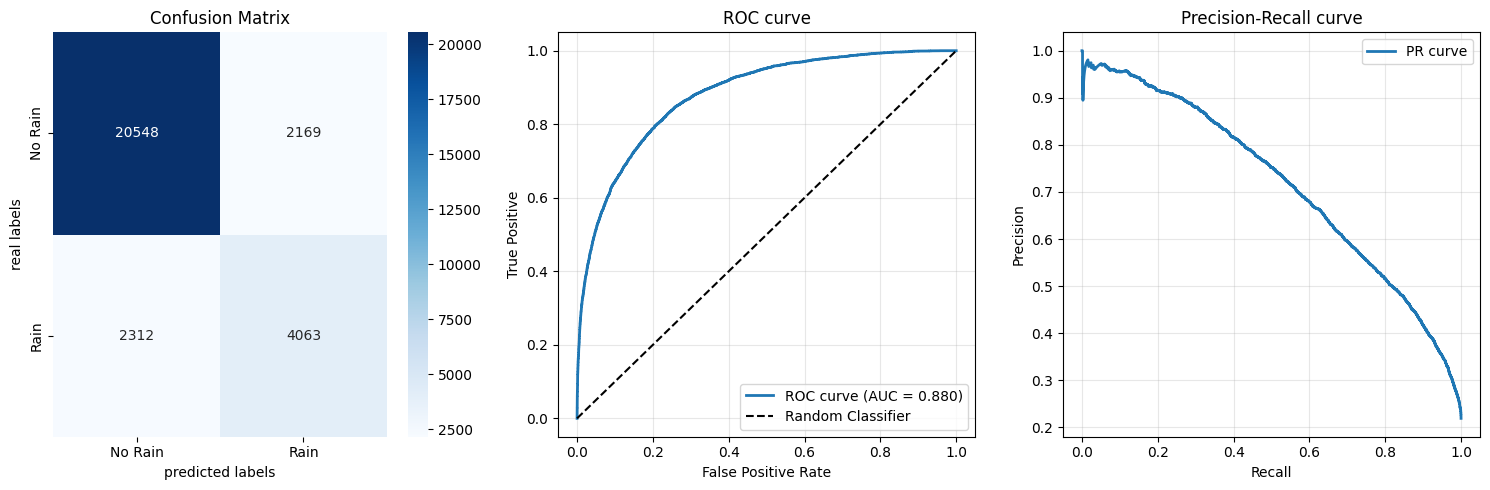

In [98]:
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=['No Rain', 'Rain']))

# Confusion Matrix
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Rain', 'Rain'], 
            yticklabels=['No Rain', 'Rain'])
plt.title('Confusion Matrix')
plt.ylabel('real labels')
plt.xlabel('predicted labels')

# ROC curve
plt.subplot(1, 3, 2)
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
plt.plot(fpr, tpr, linewidth=2, label=f'ROC curve (AUC = {test_metrics["AUC"]:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive')
plt.title('ROC curve')
plt.legend()
plt.grid(alpha=0.3)

# Precision-Recall curve
plt.subplot(1, 3, 3)
precision, recall, _ = precision_recall_curve(y_test, y_test_pred_proba)
plt.plot(recall, precision, linewidth=2, label='PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

Conclusion:

- No Rain:
    - Accuracy (0.90): When the model predicts "no rain", 90% of the cases are correct. 
    - Recall (0.90): Among all the actual "no rain" samples, 90% were correctly predicted.
    - F1 (0.90): Excellent performance

- Rain: 
    - Accuracy (0.65): When the model predicts "no rain", 65% of the cases are correct. 
    - Recall (0.64): Among all the actual "no rain" samples, 64% were correctly predicted.
    - F1 (0.64): Normal performance? Comparing to the 'No Rain' it still need to improve.

## 8.  Further Analysis and Discussion

### 8.1 Visualize decision tree (2 examples)

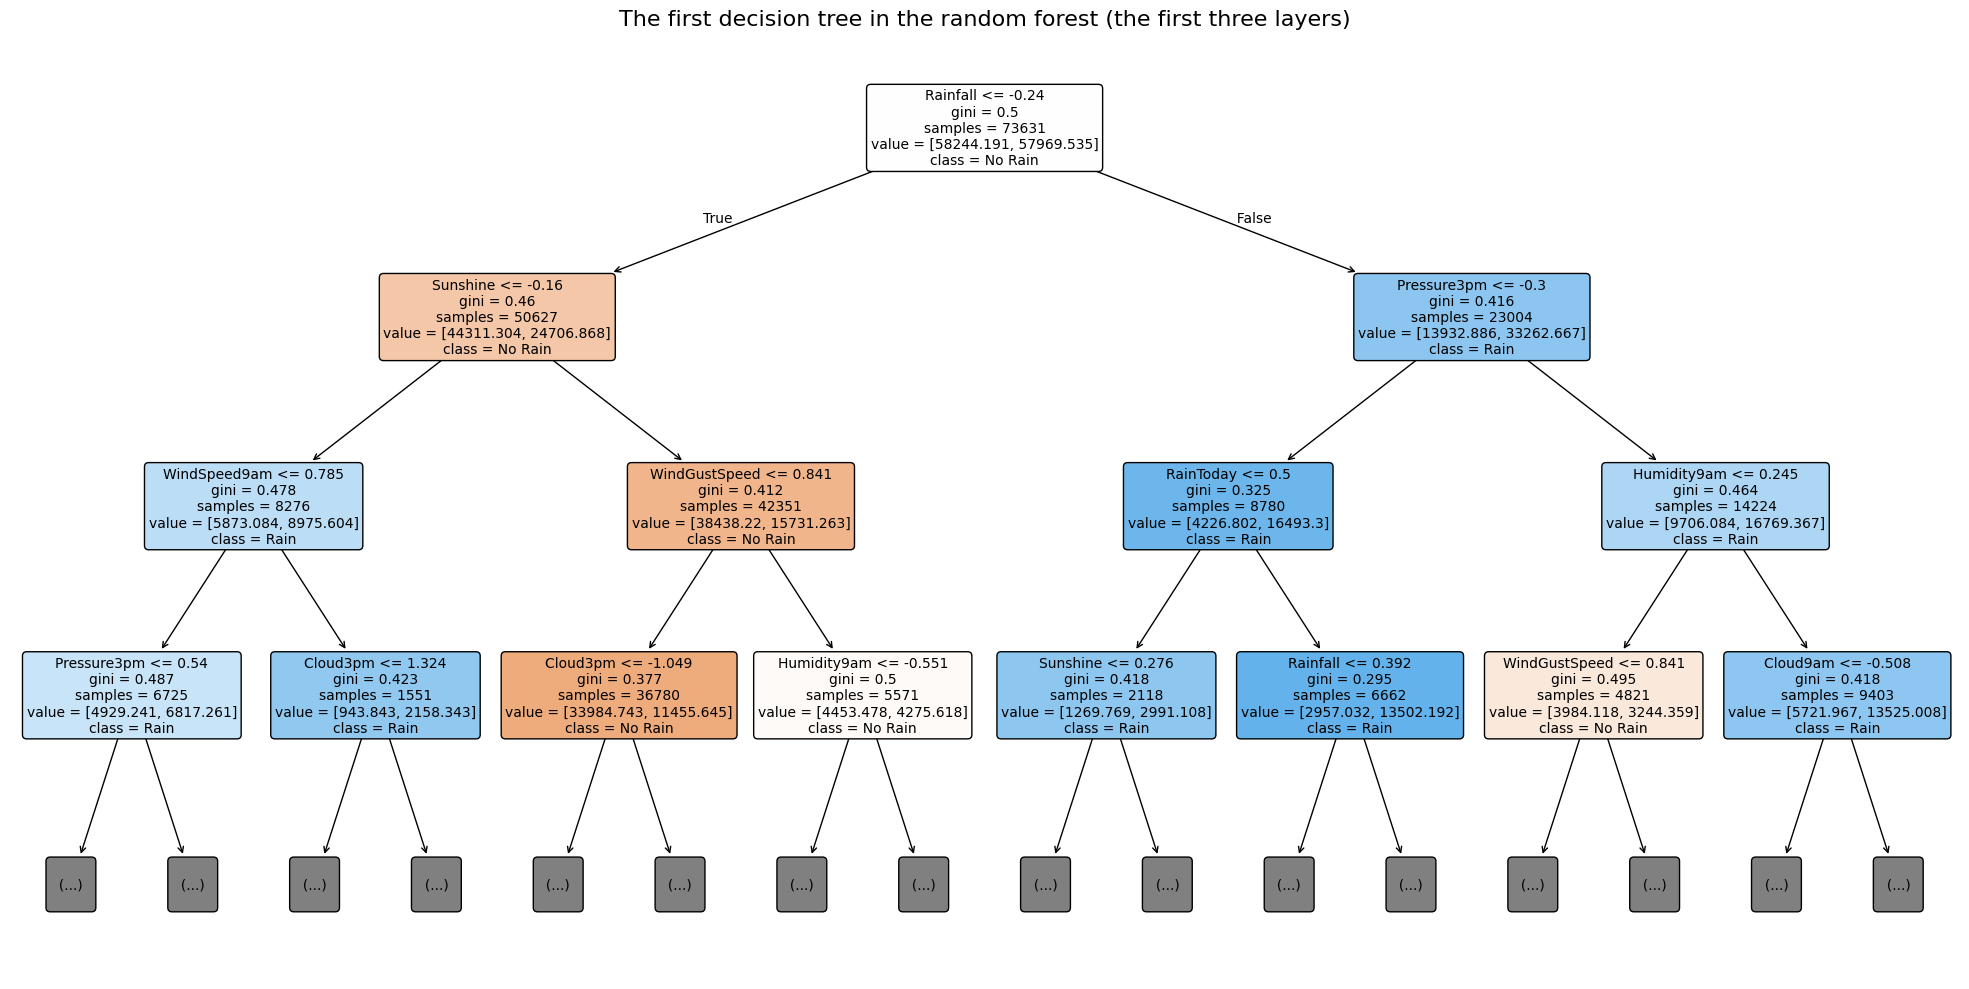

In [99]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
tree_to_plot = final_model.estimators_[0] 

plot_tree(tree_to_plot, 
          feature_names=top_15_features,
          class_names=['No Rain', 'Rain'],
          filled=True, 
          rounded=True,
          max_depth=3,  
          fontsize=10)

plt.title('The first decision tree in the random forest (the first three layers)', fontsize=16)
plt.tight_layout()
plt.show()

Explanation:

- Root Node:
    - Splitting Feature: Rainfall
    - Splitting Threshold: -0.24

- Second-level Node:
    - Left branch: Rainfall<= -0.24
    - Right branch: Rainfall > -0.24
    - Features: Sunshine & Pressure3pm

- Leaf Node:
    - The darker the blue color, the higher the probability of no rain 
    - The darker the orange color, the higher the probability of rain.


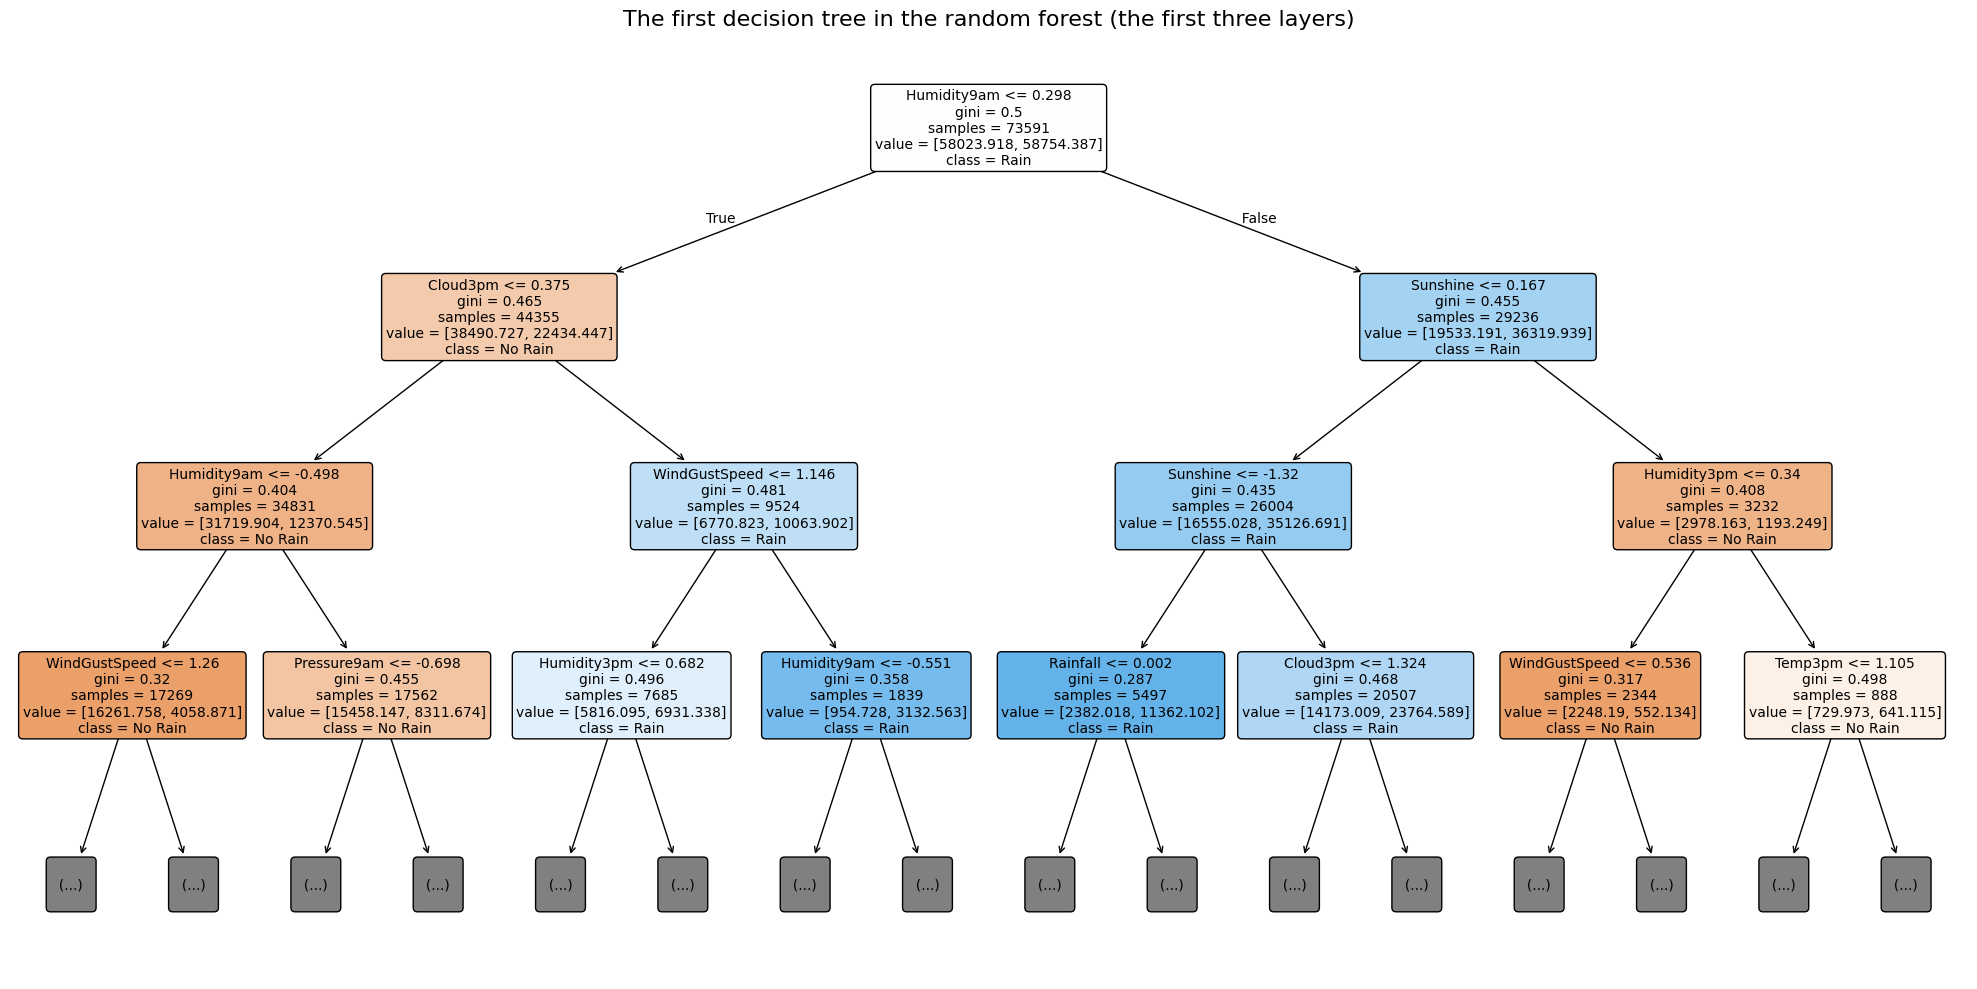

In [100]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
tree_to_plot = final_model.estimators_[20] 

plot_tree(tree_to_plot, 
          feature_names=top_15_features,
          class_names=['No Rain', 'Rain'],
          filled=True, 
          rounded=True,
          max_depth=3,  
          fontsize=10)

plt.title('The first decision tree in the random forest (the first three layers)', fontsize=16)
plt.tight_layout()
plt.show()

Explanation:

- Root Node:
    - Splitting Feature: Humidity9am
    - Splitting Threshold: 0.298

- Second-level Node:
    - Left branch: Rainfall<= 0.298
    - Right branch: Rainfall > 0.298
    - Features: Cloud3pm & Sunshine

- Leaf Node:
    - The darker the blue color, the higher the probability of no rain 
    - The darker the orange color, the higher the probability of rain.


### 8.2 Analysis of a single prediction case

- Analyze the key influencing factors when a single test sample is predicted to "rain"

In [101]:
from sklearn.inspection import permutation_importance

sample_indices = [0, 500]  # choose some test samples to analyze

for i, idx in enumerate(sample_indices):
    if idx < len(X_test):
        print(f"Case {i+1}: Test sample index {idx}")
        
        sample_features = X_test.iloc[idx]
        true_label = y_test.iloc[idx]
        pred_label = y_test_pred[idx]
        pred_proba = y_test_pred_proba[idx]
        
        print(f"True label: {'Rain' if true_label == 1 else 'No Rain'}")
        print(f"Predicted label: {'Rain' if pred_label == 1 else 'No Rain'}")
        print(f"Rain probability: {pred_proba:.3f}")
        print(f"Prediction confidence: {max(pred_proba, 1-pred_proba):.3f}")
        
        print("\n feature values:")
        top_features_impact = feature_importance.head(5)
        for _, row in top_features_impact.iterrows():
            feature_name = row['feature']
            feature_value = sample_features[feature_name]
            print(f"  {feature_name}: {feature_value:.2f}")
        
        print("=" * 50)
        

Case 1: Test sample index 0
True label: No Rain
Predicted label: No Rain
Rain probability: 0.465
Prediction confidence: 0.535

 feature values:
  Humidity3pm: 1.59
  Pressure3pm: 2.32
  Sunshine: 0.15
  Pressure9am: 2.07
  Humidity9am: 0.80
Case 2: Test sample index 500
True label: Rain
Predicted label: No Rain
Rain probability: 0.261
Prediction confidence: 0.739

 feature values:
  Humidity3pm: 0.36
  Pressure3pm: 0.14
  Sunshine: -0.18
  Pressure9am: 0.19
  Humidity9am: -0.15


Explanation:

- Case 1 (Right Prediction):
    - Prediction:
        - True label: No Rain = Predicted label
        - Probability of rain: 0.465 -> The model indicates that there is a 46.5% chance of rain. 
        - Prediction confidence: 0.535 -> The model leans towards "no rain"
    - Features:
        - Humidity3pm (1.59) -> Low -> dry air and unfavorable for rain
        - Sunshine (0.15) -> Weak -> little sunlight 
        - Pressure3pm (2.32) & Pressure9am (2.07) -> High -> unfavorable conditions for rain
        - Rainfall (-0.26) -> No rainfall
----------
- Case 2 (Wrong Prediction):
    - Prediction:
        - True label: Rain ≠ Predicted label
        - Probability of rain: 0.261 -> The model indicates that there is a 26.1% chance of rain. 
        - Prediction confidence: 0.739 -> The model leans towards "no rain"
    - Features:
        - Humidity3pm (0.36) -> Low -> dry air and unfavorable for rain
        - Sunshine (-0.18) -> no sunlight 
        - Pressure3pm (0.14) & Pressure9am(0.19) -> Low -> suitable conditions for rain
        - Rainfall (0.19) -> a little rainfall
    - This indicates that the model is not sensitive enough to weak rainfall or extreme feature samples, and is prone to false negatives.

### 8.3 Analysis of Decision Boundary

two most important features: ['Humidity3pm', 'Pressure3pm']


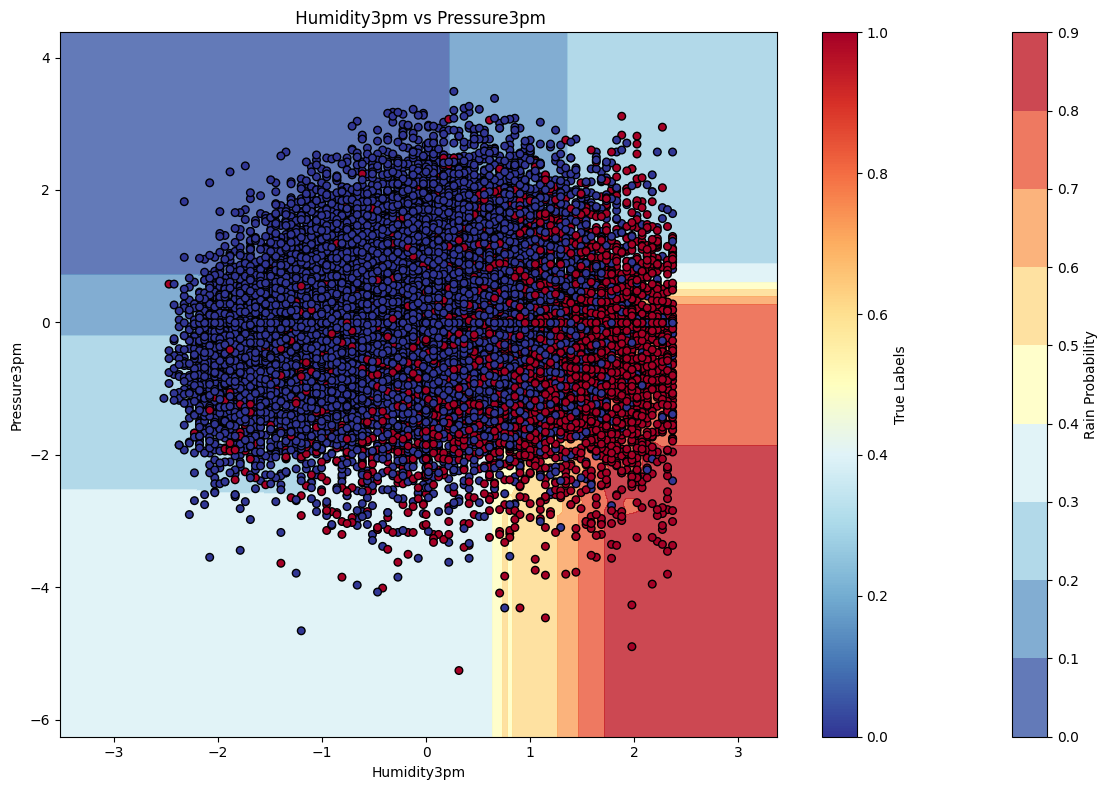

In [113]:
# select the two most important features for 2D visualization
top_2_features = feature_importance.head(2)['feature'].tolist()

if len(top_2_features) == 2:
    print(f"two most important features: {top_2_features}")
    
    X_2d = X_test[top_2_features].values
    y_2d = y_test.values
    
    x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
    y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max - x_min) / 100),
                         np.arange(y_min, y_max, (y_max - y_min) / 100))
    
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    # Use median for other features
    other_features_median = X_test.median().values
    full_grid_points = np.tile(other_features_median, (grid_points.shape[0], 1))
    full_grid_points[:, :2] = grid_points  
    
    Z = final_model.predict_proba(full_grid_points)[:, 1]
    Z = Z.reshape(xx.shape)
    

    plt.figure(figsize=(12, 8))
    contour = plt.contourf(xx, yy, Z, alpha=0.8, cmap='RdYlBu_r')
    plt.colorbar(contour, label='Rain Probability')
    
 
    scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, 
                         cmap='RdYlBu_r', edgecolors='black', s=30)
    plt.colorbar(scatter, label='True Labels')
    
    plt.xlabel(top_2_features[0])
    plt.ylabel(top_2_features[1])
    plt.title(f' {top_2_features[0]} vs {top_2_features[1]}')
    plt.tight_layout()
    plt.show()

Explanation

- Red scatter means no rain, and blue scatter means rain
- In the background, the red area means the model predicts the probility of no rain is high (close to 0), while the blue area means the model predicts the probility of rain is high (close to 1)
- If there are any discrepancies in color and labels, it indicates that the model has made an incorrect prediction.

### 8.4 Analysis of Prediction Confidence 

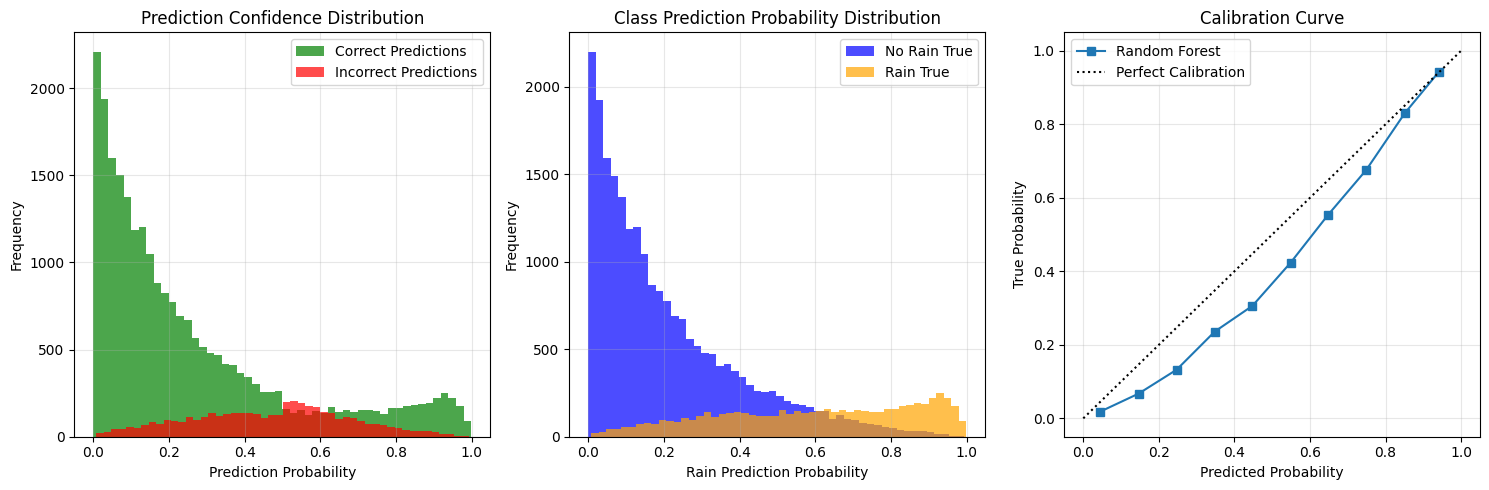

Confidence Statistics:


,Metric,Value
0,Average Confidence,0.2927
1,Average Confidence of Correct Predictions,0.2605
2,Average Confidence of Incorrect Predictions,0.4692
3,Accuracy with High Confidence (>0.8),0.8839
4,Accuracy with Low Confidence (<0.6),0.8665


In [103]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
# Confidence of correct predictions
correct_mask = y_test_pred == y_test
plt.hist(y_test_pred_proba[correct_mask], bins=50, alpha=0.7, 
         label='Correct Predictions', color='green')
plt.hist(y_test_pred_proba[~correct_mask], bins=50, alpha=0.7, 
         label='Incorrect Predictions', color='red')
plt.xlabel('Prediction Probability')
plt.ylabel('Frequency')
plt.title('Prediction Confidence Distribution')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 3, 2)
# Different class prediction probability distributions
plt.hist(y_test_pred_proba[y_test == 0], bins=50, alpha=0.7, 
         label='No Rain True', color='blue')
plt.hist(y_test_pred_proba[y_test == 1], bins=50, alpha=0.7, 
         label='Rain True', color='orange')
plt.xlabel('Rain Prediction Probability')
plt.ylabel('Frequency')
plt.title('Class Prediction Probability Distribution')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 3, 3)
# Calibration curve
from sklearn.calibration import calibration_curve
fraction_of_positives, mean_predicted_value = calibration_curve(
    y_test, y_test_pred_proba, n_bins=10)

plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="Random Forest")
plt.plot([0, 1], [0, 1], "k:", label="Perfect Calibration")
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.title("Calibration Curve")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Confidence statistics
confidence_stats = pd.DataFrame({
    'Metric': ['Average Confidence', 'Average Confidence of Correct Predictions', 'Average Confidence of Incorrect Predictions', 
               'Accuracy with High Confidence (>0.8)', 'Accuracy with Low Confidence (<0.6)'],
    'Value': [y_test_pred_proba.mean(),
             y_test_pred_proba[correct_mask].mean(),
             y_test_pred_proba[~correct_mask].mean(),
             accuracy_score(y_test[y_test_pred_proba > 0.8], 
                           y_test_pred[y_test_pred_proba > 0.8]),
             accuracy_score(y_test[y_test_pred_proba < 0.6], 
                           y_test_pred[y_test_pred_proba < 0.6])]
}).round(4)

print("Confidence Statistics:")
display(confidence_stats)

Explanation:

- Subfigure 1: Distribution of Prediction Confidence (Correct vs. Incorrect)
    - Green bar: Probability distribution of the model's correct predictions. 
    - Red bar: Probability distribution of model prediction errors.
    - Green color is mainly concentrated in high probability areas (close to 1 or close to 0), which means the model is confident and correct. 
    - The red color is mainly concentrated in the middle probability range (0.4 - 0.6), which means the model is uncertain or easier to errors
---------
- Subfigure 2: Probability Distribution of Predictions for Different Categories
    - Blue bar: The true predicted probability of "no rain" for the sample. 
    - Orange column: The true predicted probability of "rain" in the sample.
    - The blue color is mainly concentrated in the low-probability area, which means the model correctly predicted "no rain". 
    - The orange color is mainly concentrated in the high-probability area which means the model correctly predicted "rain".
-----------
- Subfigure 3: Probability Calibration Curve
    - Black dotted line: Perfect calibration (predicted probability equals true probability). 
    - The green curve: The actual calibration situation of the model. 
    - The curve is close to the dotted line means the model's probability is reliable. 
    - Curves that are skewed upwards/downwards means the model overestimates/underestimates the probability.

### 8.5 Analysis of Error Cases

Find all the samples that the model predicted incorrectly and count each type of error.

- high-confidence errors: the model is very confident but predicts wrongly
- low-confidence: the model itself is not sure

In [104]:
wrong_predictions = X_test[y_test != y_test_pred].copy()
wrong_predictions['true_label'] = y_test[y_test != y_test_pred]
wrong_predictions['predicted_label'] = y_test_pred[y_test != y_test_pred]
wrong_predictions['probability'] = y_test_pred_proba[y_test != y_test_pred]

print(f"Total number of errors: {len(wrong_predictions)}")
print(f"Error rate: {len(wrong_predictions)/len(y_test):.3f}")

if len(wrong_predictions) > 0:
    error_types = wrong_predictions.groupby(['true_label', 'predicted_label']).size()
    print("\nError type distribution:")
    for (true, pred), count in error_types.items():
        true_name = 'Rain' if true == 1 else 'No Rain'
        pred_name = 'Rain' if pred == 1 else 'No Rain'
        print(f"  {true_name} -> {pred_name}: {count} times")
    
    # Display some typical error cases
    print("\nTypical error case analysis:")
    high_confidence_errors = wrong_predictions.nlargest(3, 'probability')
    low_confidence_errors = wrong_predictions.nsmallest(3, 'probability')
    
    print("High confidence errors:")
    for idx, row in high_confidence_errors.iterrows():
        print(f"  Sample {idx}: True {row['true_label']}, Predicted {row['predicted_label']}, Probability {row['probability']:.3f}")
    
    print("Low confidence errors:")
    for idx, row in low_confidence_errors.iterrows():
        print(f"  Sample {idx}: True {row['true_label']}, Predicted {row['predicted_label']}, Probability {row['probability']:.3f}")

Total number of errors: 4481
Error rate: 0.154

Error type distribution:
  No Rain -> Rain: 2169 times
  Rain -> No Rain: 2312 times

Typical error case analysis:
High confidence errors:
  Sample 140114: True 0.0, Predicted 1.0, Probability 0.993
  Sample 109039: True 0.0, Predicted 1.0, Probability 0.991
  Sample 43032: True 0.0, Predicted 1.0, Probability 0.977
Low confidence errors:
  Sample 23307: True 1.0, Predicted 0.0, Probability 0.008
  Sample 97323: True 1.0, Predicted 0.0, Probability 0.008
  Sample 129994: True 1.0, Predicted 0.0, Probability 0.013


Explanation:

- The number of false alarms on sunny days and missed reports on rainy days are similar, indicating that the model does not have a strong bias towards any one category.
- High-confidence errors: The model made incorrect predictions with a high probability of 97% to 99%. This means that the model is "overconfident" in certain feature combinations, possibly: 
    - Some extreme values of certain features misled the model. 
    - The imbalance in the distribution of the training set leads to the reinforcement of certain patterns. 
    - Tree model overfits some features. 
- Low-confidence errors: The probability of such errors is close to 0, which indicates: 
    - The decision boundary of the model near these samples is very blurry. 
    - The categories are difficult to be separated in the feature space. 
    - The features are not sufficient to distinguish whether it will rain tomorrow.

## 9.  Discussion

Summarize the entire project, evaluate the performance of the model, discuss its advantages and disadvantages, and propose directions for future improvement.

### 9.1 Final Discussion

This project applied a Random Forest classifier to predict rainfall using meteorological data. Through a complete pipeline including data preprocessing, feature engineering, model training and performance evaluation to thoroughly assessed the model' s predictive capability.

On the test set, final_model achieved an error rate of 15.4%, showing stable performance. High-confidence predictions (probability >0.8) achieved 88.4% accuracy, indicating that when the model is confident, its decisions are highly reliable. However, more errors occur near the decision boundary (probabilities around 0.4–0.6), reflecting the noisy and uncertain nature of weather data.

Cross-validation results show good stability: F1-score CV mean is 0.6389 versus test F1 of 0.6446 (difference 0.0057); Accuracy, Precision, Recall, and AUC differ by less than 0.01 between CV and test, indicating minimal overfitting.

### 9.2 Core Conclusion

Based on the performance of final_model, we conclude that Random Forest can predict rainfall with reasonable accuracy, with high-confidence predictions being very reliable, while still facing limitations on uncertain or borderline samples.

### 9.3 Pros & Cons

- Pros:
    - High overall accuracy on the test set (84.6%), showing stable performance.
    - High-confidence predictions are highly accurate (88.4%), indicating reliability.
    - Classification report shows very accurate predictions for the “No Rain” class, and error types are balanced.
    - Strong consistency between cross-validation and test set indicates minimal overfitting.
    - Visual analyses (confidence histograms, calibration curve, high/low confidence errors) provide deep insights.
--------
- Cons:
    - Lower performance on the “Rain” class (F1 0.64), indicating some false negatives.
    - High-confidence errors still exist
    - The model does not fully utilize temporal features
    - Random Forest has limited ability to capture rare extreme events (storms, heavy rainfall).

### 9.4 Future Work

- Adjust the classification threshold to reduce false negatives for rainfall.
- Incorporate temporal models (LSTM, Temporal CNN) to capture sequential weather patterns.
- Evaluate stronger models such as XGBoost, LightGBM, and GRU.
- Add more informative features (pressure change rate, wind speed change, short-term humidity variations).
- Conduct in-depth analysis of high-confidence error cases to identify causes of overconfidence.
- Apply probability calibration techniques (Platt Scaling, Isotonic Regression) to improve prediction reliability.